#**Classification sur la qualité des cookies**

L'objectif de ce projet est de réaliser une classification avec différents modèles de machine learning afin de choisir lequel permettrait de prédire au mieux la qualité des cookies.

Pour cela nous disposons de deux bases de données. Une première correspondant à l'échantillon train, qui est constituée de 10000 observations pour 28 variables qui servira pour entraîner les modèles. Et une deuxième correspondant à l'échantillon test, constituée de 2000 observations pour 27 variables qui servira pour la prédiction. Sur cette dernière base de données, les vraies valeurs de la variable cible ne figurent pas.

Les différentes variables sont donc :

  Variables explicatives :    

*   `id` - a unique identifier for each data point
*   `earthName` - name of the version of earth
*   `dateOfDiscovery` - date of discovery
*   `discovererName` - name of the discoverer
*   ` prec_noix ` - Presence of nuts
*   ` prec_chocolat ` - Presence of chocolate
*   ` prec_noisettes ` - Presence of hazelnuts
*   ` prec_raisins ` - Presence of raisins
*   ` prec_fruits_confits ` - Presence of candied fruits
*   ` prec_lait ` - Presence of milk
*   ` ph_eau ` - PH of raw water
*   ` pop ` - Humanoïd population
*   ` prop_grand_meres ` - Proportion of grandmothers in humanoid population
*   ` freq_boulangeries ` - Frequency of bakeries
*   ` nb_visites_hebdo ` - Number of weekly visits to bakeries
*   ` prix ` - Price of a cookie
*   ` nb_bras ` - Number of arms of the humanoid
*   ` nb_doigts_main ` - Number of fingers on the main hand of the humanoid species
*   ` nb_dents ` - Number of teeth of the humanoid species (including wisdom teeth)
*   ` taux_oxygene_atm ` - Oxygen rate in the atmosphere
*   ` dist_lune_km ` - Distance between the planet and the moon (in km)
*   ` dist_soleil_km ` - Distance between the planet and the sun (in km)
*   ` dist_centre_galaxie_ly ` - Distance between the planet and the center of the galaxy (in light years)
*   ` niveau_techno ` - Technological advancement of the humanoid species
*   ` nb_guerres_mondiales ` - Number of world wars
*   ` methode_cuisson ` - Method of cooking the cookie
*   ` nb_cookies_vendus ` - Number of cookies sold per year on the planet


Variable cible :    

*   ` cookie_quality ` - Cookie quality (yum or yuck)

## Chargement des packages

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

## Chargement du Data Set


In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
chemin_fichier = '/content/drive/MyDrive/train.csv'
train = pd.read_csv(chemin_fichier, sep=",")
train.head(5)

,id,earthName,dateOfDiscovery,discovererName,prec_noix,prec_chocolat,prec_noisettes,prec_raisins,prec_fruits_confits,prec_lait,...,nb_dents,taux_oxygene_atm,dist_lune_km,dist_soleil_km,dist_centre_galaxie_ly,niveau_techno,nb_guerres_mondiales,methode_cuisson,nb_cookies_vendus,cookie_quality
0,25101,Earth41480,2058-12-06,Floyd Howard,non,non,non,non,oui,oui,...,NaN,0.21,NaN,197700000,10100,moyen-age,31.0,Soleil,1.560000e+10,yuk
1,120860,Earth199137,2137-03-18,Grace Torres,oui,oui,oui,oui,oui,non,...,44.0,0.18,430100.0,169100000,16100,apocalyptique,27.0,Fer à repasser,1.428000e+10,yum
2,128633,Earth212192,2159-11-20,Vicky Figueroa,oui,oui,non,non,non,non,...,NaN,0.18,531200.0,205200000,18400,numérique,24.0,Micro-Ondes,1.368000e+10,yuk
3,173087,Earth285866,2195-09-01,May Hull,non,non,oui,non,non,oui,...,26.0,0.17,448000.0,215400000,16700,préhistoire,20.0,Feu de Bois,1.561000e+10,yum
4,50605,Earth83432,2146-04-25,James Yu,oui,oui,non,oui,oui,non,...,32.0,0.20,NaN,177800000,11400,industriel,16.0,Poele,1.348000e+10,yum


## **1-Analyse exploratoire**

### Informations de la base de données Train

In [ ]:
#Vérification du nombre de lignes et de colonnes:
train.shape

#Il y a 10000 lignes pour 28 colonnes

(10000, 28)

In [ ]:
#Vérification des types des variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10000 non-null  int64  
 1   earthName               10000 non-null  object 
 2   dateOfDiscovery         10000 non-null  object 
 3   discovererName          10000 non-null  object 
 4   prec_noix               8999 non-null   object 
 5   prec_chocolat           9903 non-null   object 
 6   prec_noisettes          9850 non-null   object 
 7   prec_raisins            8664 non-null   object 
 8   prec_fruits_confits     9912 non-null   object 
 9   prec_lait               10000 non-null  object 
 10  ph_eau                  10000 non-null  int64  
 11  pop                     10000 non-null  int64  
 12  prop_grand_meres        10000 non-null  float64
 13  freq_boulangeries       10000 non-null  int64  
 14  nb_visites_hebdo        10000 non-null 

Il y a 9 variables réelles, 7 variables entières et 12 variables catégorielles

In [ ]:
# on change le type des variables object en category.
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = train[col].astype('category')

### Valeurs manquantes

In [ ]:
na = train.isna().sum()/train.shape[0]*100
na.sort_values()

id                         0.00
niveau_techno              0.00
dist_centre_galaxie_ly     0.00
dist_soleil_km             0.00
taux_oxygene_atm           0.00
nb_visites_hebdo           0.00
prop_grand_meres           0.00
pop                        0.00
ph_eau                     0.00
freq_boulangeries          0.00
cookie_quality             0.00
earthName                  0.00
dateOfDiscovery            0.00
discovererName             0.00
prec_lait                  0.00
nb_guerres_mondiales       0.88
prec_fruits_confits        0.88
nb_bras                    0.93
prec_chocolat              0.97
nb_cookies_vendus          1.01
methode_cuisson            1.07
prec_noisettes             1.50
nb_dents                   9.95
prec_noix                 10.01
prix                      10.18
dist_lune_km              10.25
nb_doigts_main            10.34
prec_raisins              13.36
dtype: float64

Il y a 13 variables qui contiennent des valeurs manquantes. Nous allons imputer des valeurs en utilisant les valeurs les plus fréquentes de chaque colonne respective. Aucune variable n'est supprimé car aucune n'a plus de 40% de valeurs manquantes.

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,
                    strategy='most_frequent',
                    )

trainImputed = pd.DataFrame(
    imp.fit_transform(train),
    columns=train.columns
    )

### Représentation de la variables cible

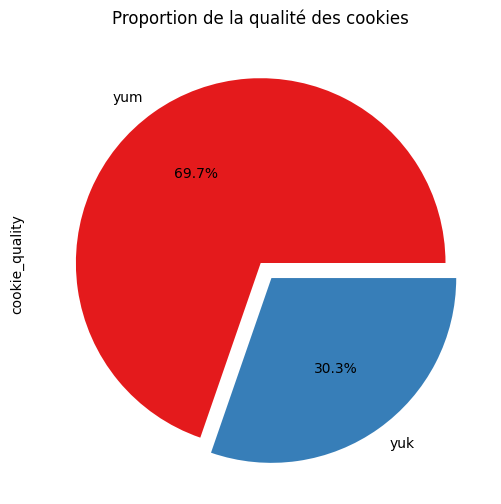

In [ ]:
p = trainImputed['cookie_quality'].value_counts().plot(kind='pie',
                                           figsize=(10, 6),
                                           title ="Proportion de la qualité des cookies",
                                           autopct='%1.1f%%',
                                           colors=["#e41a1c","#377eb8"],
                                           explode = (0, 0.1)
                                           )    # Plot a pie chart
plt.show()

La variable cible est une variable qualitative binaire.
Il y a 70% de cookies de bonne qualité (yum) contre 30% de mauvaise (yuk).

### Statistiques descriptives des variables qualitatives

<ipython-input-12-72f4dba84772>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], x="methode_cuisson", data=trainImputed, palette="Set2")
<ipython-input-12-72f4dba84772>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 1], x="niveau_techno", data=trainImputed, palette="Set2")
<ipython-input-12-72f4dba84772>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1, 0], x="prec_noix", data=trainImputed, palette="Set2")
<ipython-input-12-72f4dba84772>:8: FutureWarning: 

Passing `palette` without assigning `hue`

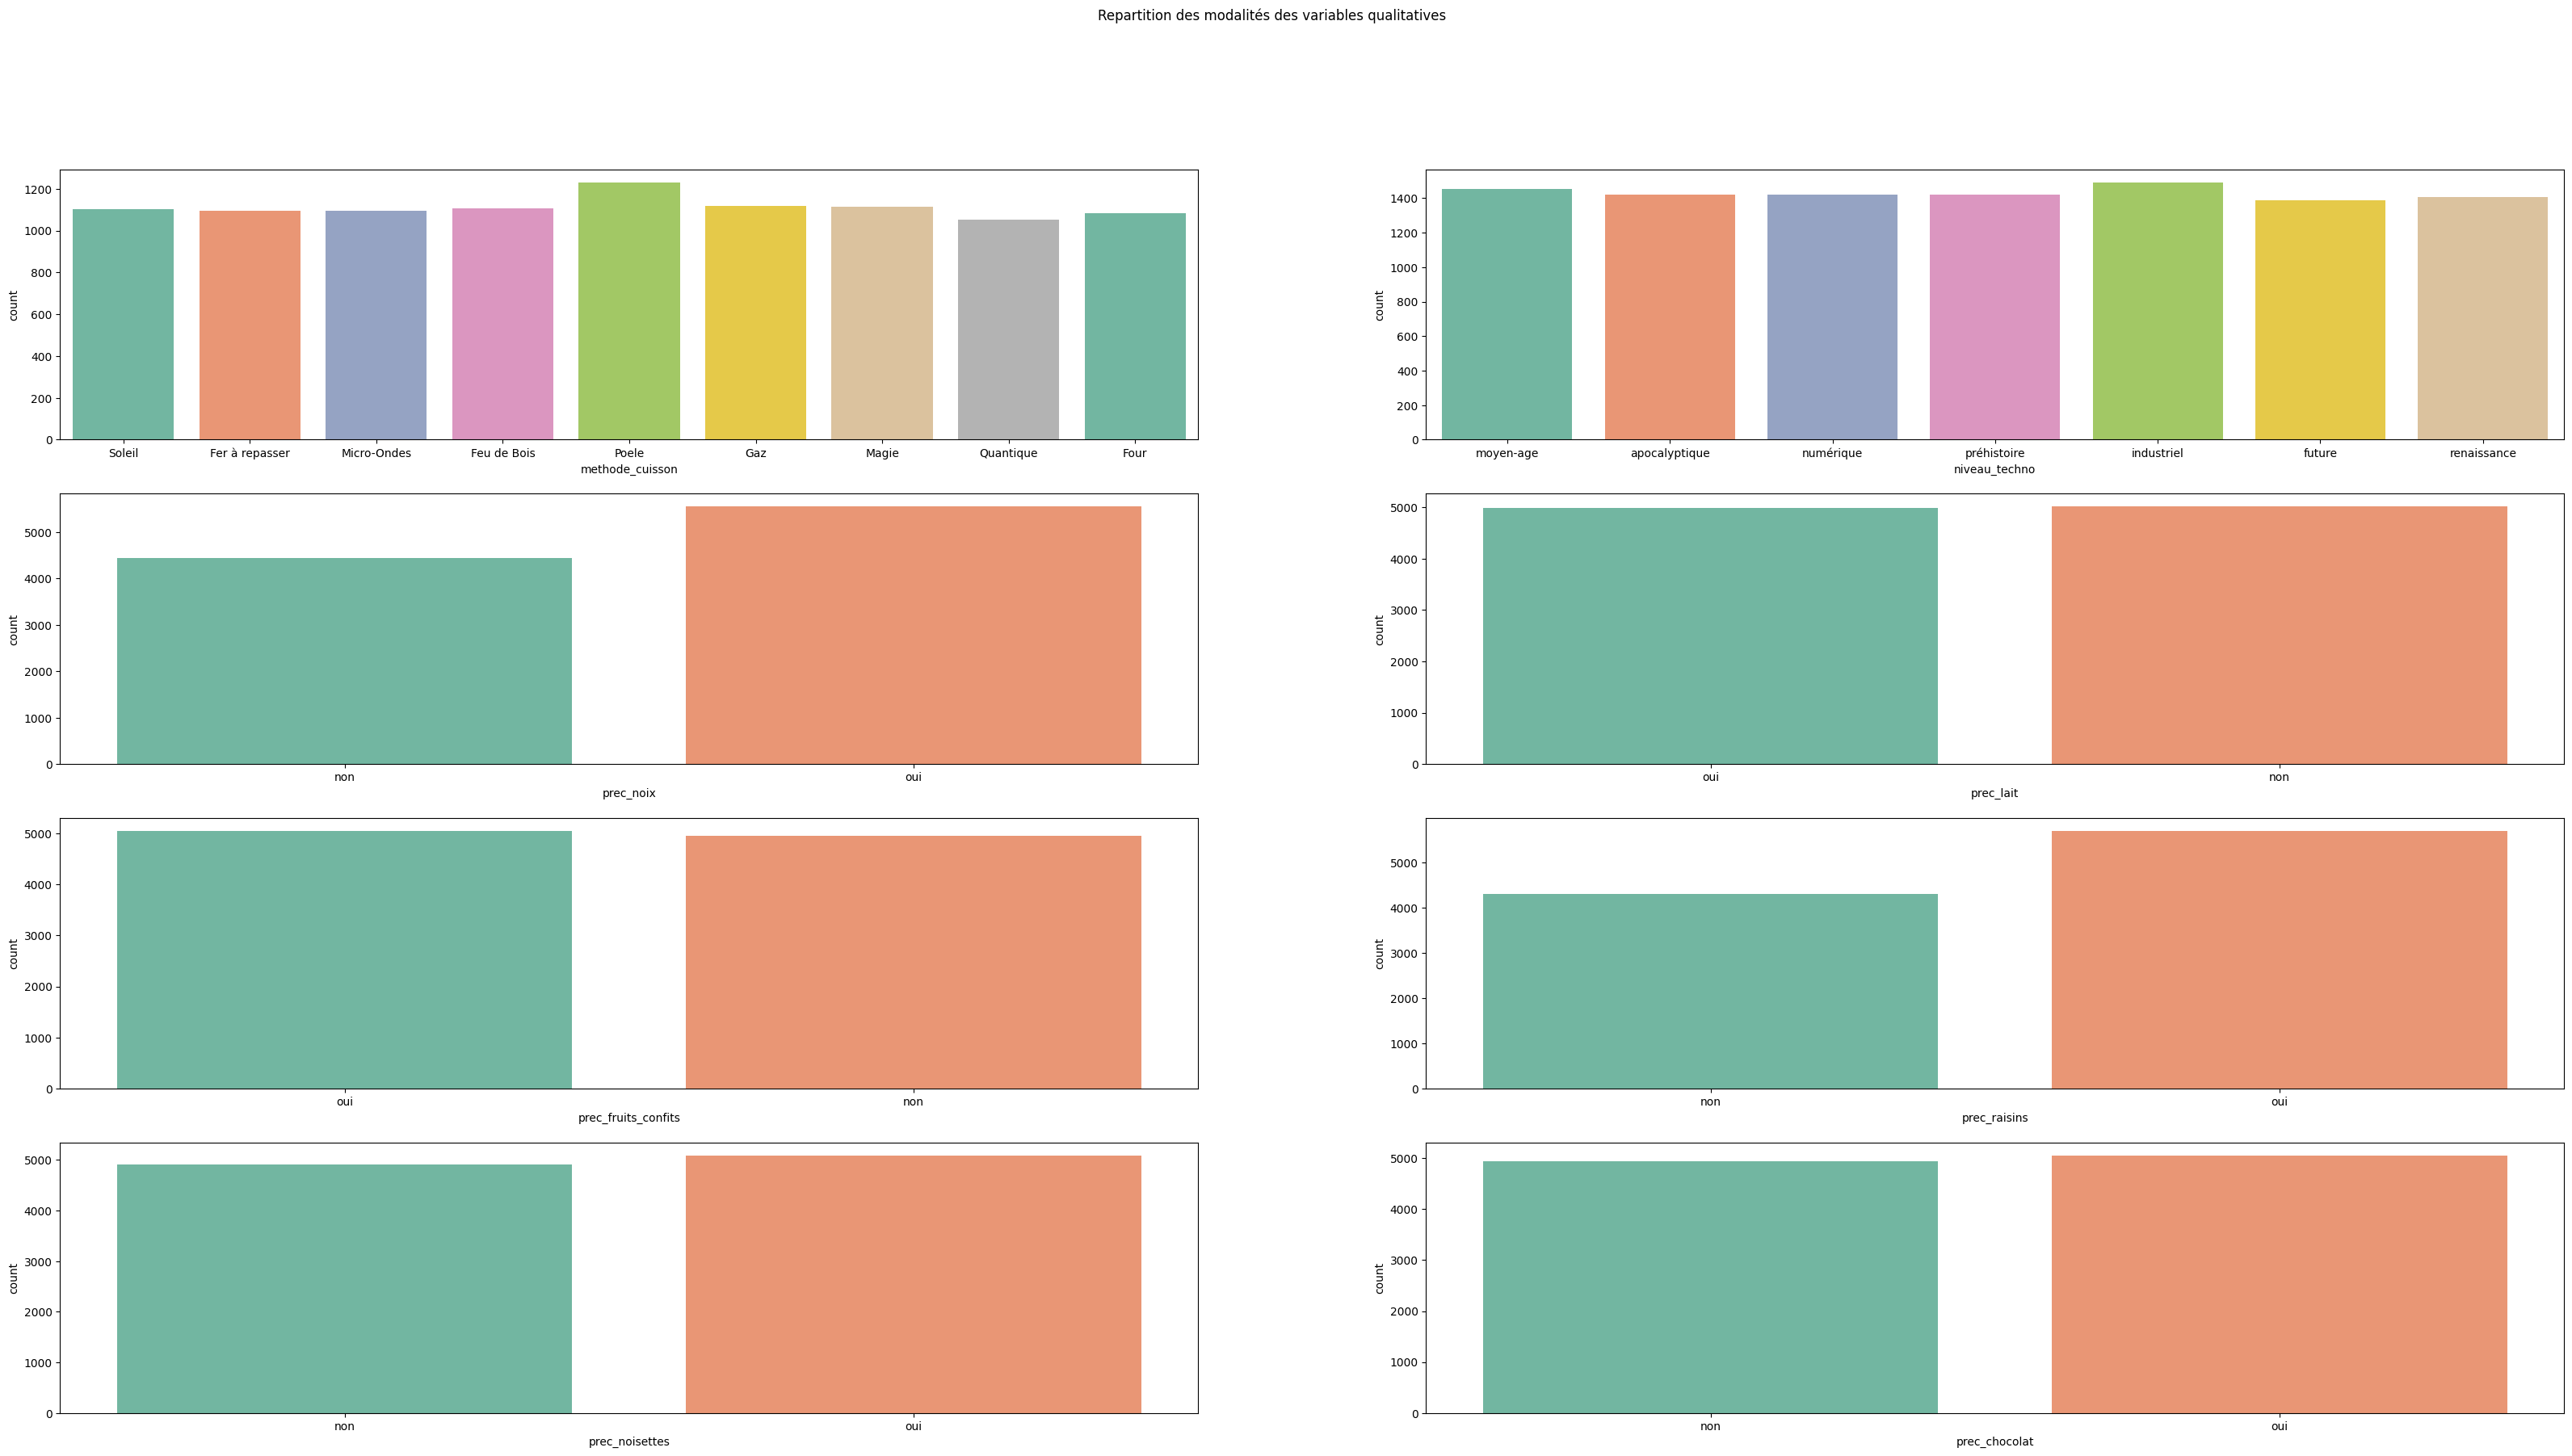

In [ ]:
# Repartition des modalités des variables qualitatives

fig, axes = plt.subplots(4, 2, figsize=(40, 20))
fig.suptitle('Repartition des modalités des variables qualitatives')
sns.countplot(ax=axes[0, 0], x="methode_cuisson", data=trainImputed, palette="Set2")
sns.countplot(ax=axes[0, 1], x="niveau_techno", data=trainImputed, palette="Set2")
sns.countplot(ax=axes[1, 0], x="prec_noix", data=trainImputed, palette="Set2")
sns.countplot(ax=axes[1, 1], x="prec_lait", data=trainImputed, palette="Set2")
sns.countplot(ax=axes[2, 0], x="prec_fruits_confits", data=trainImputed, palette="Set2")
sns.countplot(ax=axes[2, 1], x="prec_raisins", data=trainImputed, palette="Set2")
sns.countplot(ax=axes[3, 0], x="prec_noisettes", data=trainImputed, palette="Set2")
sns.countplot(ax=axes[3, 1], x="prec_chocolat", data=trainImputed, palette="Set2")
plt.show()

Ces graphiques nous montrent la répartitions des modalités des différentes variables explicatives qualitatives. On peut constater, que pour l'ensemble des variables, les modalités sont plus ou moins équilibrées.

### Statistiques descriptives des variables quantitatives

In [ ]:
#création d'une base ne comportant que les variables quantitatives:
var_quanti = trainImputed.drop(columns=['id', 'earthName', 'dateOfDiscovery', 'discovererName', 'prec_noix', 'prec_chocolat', 'prec_noisettes', 'prec_raisins', 'prec_fruits_confits', 'prec_lait', 'niveau_techno', 'methode_cuisson', 'cookie_quality'])
var_quanti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ph_eau                  10000 non-null  object
 1   pop                     10000 non-null  object
 2   prop_grand_meres        10000 non-null  object
 3   freq_boulangeries       10000 non-null  object
 4   nb_visites_hebdo        10000 non-null  object
 5   prix                    10000 non-null  object
 6   nb_bras                 10000 non-null  object
 7   nb_doigts_main          10000 non-null  object
 8   nb_dents                10000 non-null  object
 9   taux_oxygene_atm        10000 non-null  object
 10  dist_lune_km            10000 non-null  object
 11  dist_soleil_km          10000 non-null  object
 12  dist_centre_galaxie_ly  10000 non-null  object
 13  nb_guerres_mondiales    10000 non-null  object
 14  nb_cookies_vendus       10000 non-null  object
dtypes: 

In [ ]:
# On réajuste le type des variables en nombre réel.
for col in var_quanti.columns:
    if var_quanti[col].dtype == 'object':
        var_quanti[col] = var_quanti[col].astype('float64')

In [ ]:
#affichage des différentes statistiques descriptives des variables quantitatives:
var_quanti.describe()

,ph_eau,pop,prop_grand_meres,freq_boulangeries,nb_visites_hebdo,prix,nb_bras,nb_doigts_main,nb_dents,taux_oxygene_atm,dist_lune_km,dist_soleil_km,dist_centre_galaxie_ly,nb_guerres_mondiales,nb_cookies_vendus
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04
mean,7.878900,6.205526e+09,0.198693,6.784100,6.154900,285.740000,4.010800,7.054200,29.409600,0.197331,475232.510000,1.922121e+08,14911.940000,21.065800,1.425836e+10
std,1.341423,1.306609e+09,0.021981,1.610698,1.550337,51.191879,0.684054,0.976298,4.110805,0.021849,51238.788973,2.192815e+07,2640.533408,4.154636,2.926774e+09
min,3.000000,1.008660e+09,0.120000,1.000000,1.000000,80.000000,2.000000,4.000000,14.000000,0.110000,279600.000000,1.103000e+08,4300.000000,4.000000,3.240000e+09
25%,7.000000,5.302733e+09,0.180000,6.000000,5.000000,254.000000,4.000000,6.000000,26.000000,0.180000,444200.000000,1.769000e+08,13100.000000,18.000000,1.224000e+10
50%,8.000000,6.210690e+09,0.200000,7.000000,6.000000,293.000000,4.000000,7.000000,30.000000,0.200000,467800.000000,1.915000e+08,14900.000000,21.000000,1.409000e+10
75%,9.000000,7.097081e+09,0.210000,8.000000,7.000000,317.000000,4.000000,8.000000,32.000000,0.210000,507700.000000,2.070000e+08,16700.000000,24.000000,1.616000e+10
max,13.000000,1.143808e+10,0.290000,13.000000,12.000000,473.000000,6.000000,11.000000,46.000000,0.280000,663500.000000,2.733000e+08,25700.000000,37.000000,2.662000e+10


On peut remarquer des différences d'échelle entre les variables en regardant les valeurs moyennes. Les standardiser seraient mieux pour pouvoir les comparer indépendament de leur unité et gagner en temps de calcul. Cependant l'interprétation individuelle des variables risque d'être compromise.

In [ ]:
#Vérification de la normalité des variables quantitatives
# On crée un tableau pour stocker les résultats
resultats_tests = pd.DataFrame(columns=['Variable', 'Statistique de test', 'p-value', 'Suit loi normale (5%)'])

# Boucle pour effectuer le shapiro test sur chaque variable:
for colonne in var_quanti.columns:
    # Effectuez le test de normalité de Shapiro-Wilk
    statistique, p_value = shapiro(var_quanti[colonne])

    # Ajoutez les résultats au tableau
    suit_loi_normale = 'Oui' if p_value > 0.05 else 'Non'
    resultats_tests = resultats_tests.append({
        'Variable': colonne,
        'Statistique de test': statistique,
        'p-value': p_value,
        'Suit loi normale (5%)': suit_loi_normale
    }, ignore_index=True)

# Affichez le tableau des résultats
resultats_tests

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
<ipython-input-18-35f7c4e67947>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultats_tests = resultats_tests.append({
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
<ipython-input-18-35f7c4e67947>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultats_tests = resultats_tests.append({
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
<ipython

,Variable,Statistique de test,p-value,Suit loi normale (5%)
0,ph_eau,0.951685,0.000000e+00,Non
1,pop,0.999905,9.774680e-01,Oui
2,prop_grand_meres,0.982457,2.670649e-33,Non
3,freq_boulangeries,0.967423,1.457350e-42,Non
4,nb_visites_hebdo,0.964934,9.668959e-44,Non
5,prix,0.994535,4.627218e-19,Non
6,nb_bras,0.466168,0.000000e+00,Non
7,nb_doigts_main,0.909721,0.000000e+00,Non
8,nb_dents,0.975879,6.442303e-38,Non
9,taux_oxygene_atm,0.982379,2.315621e-33,Non


Il n'y a que deux variables qui suivent une loi normale, celle de la population et celle de la distance au centre de la galaxy.

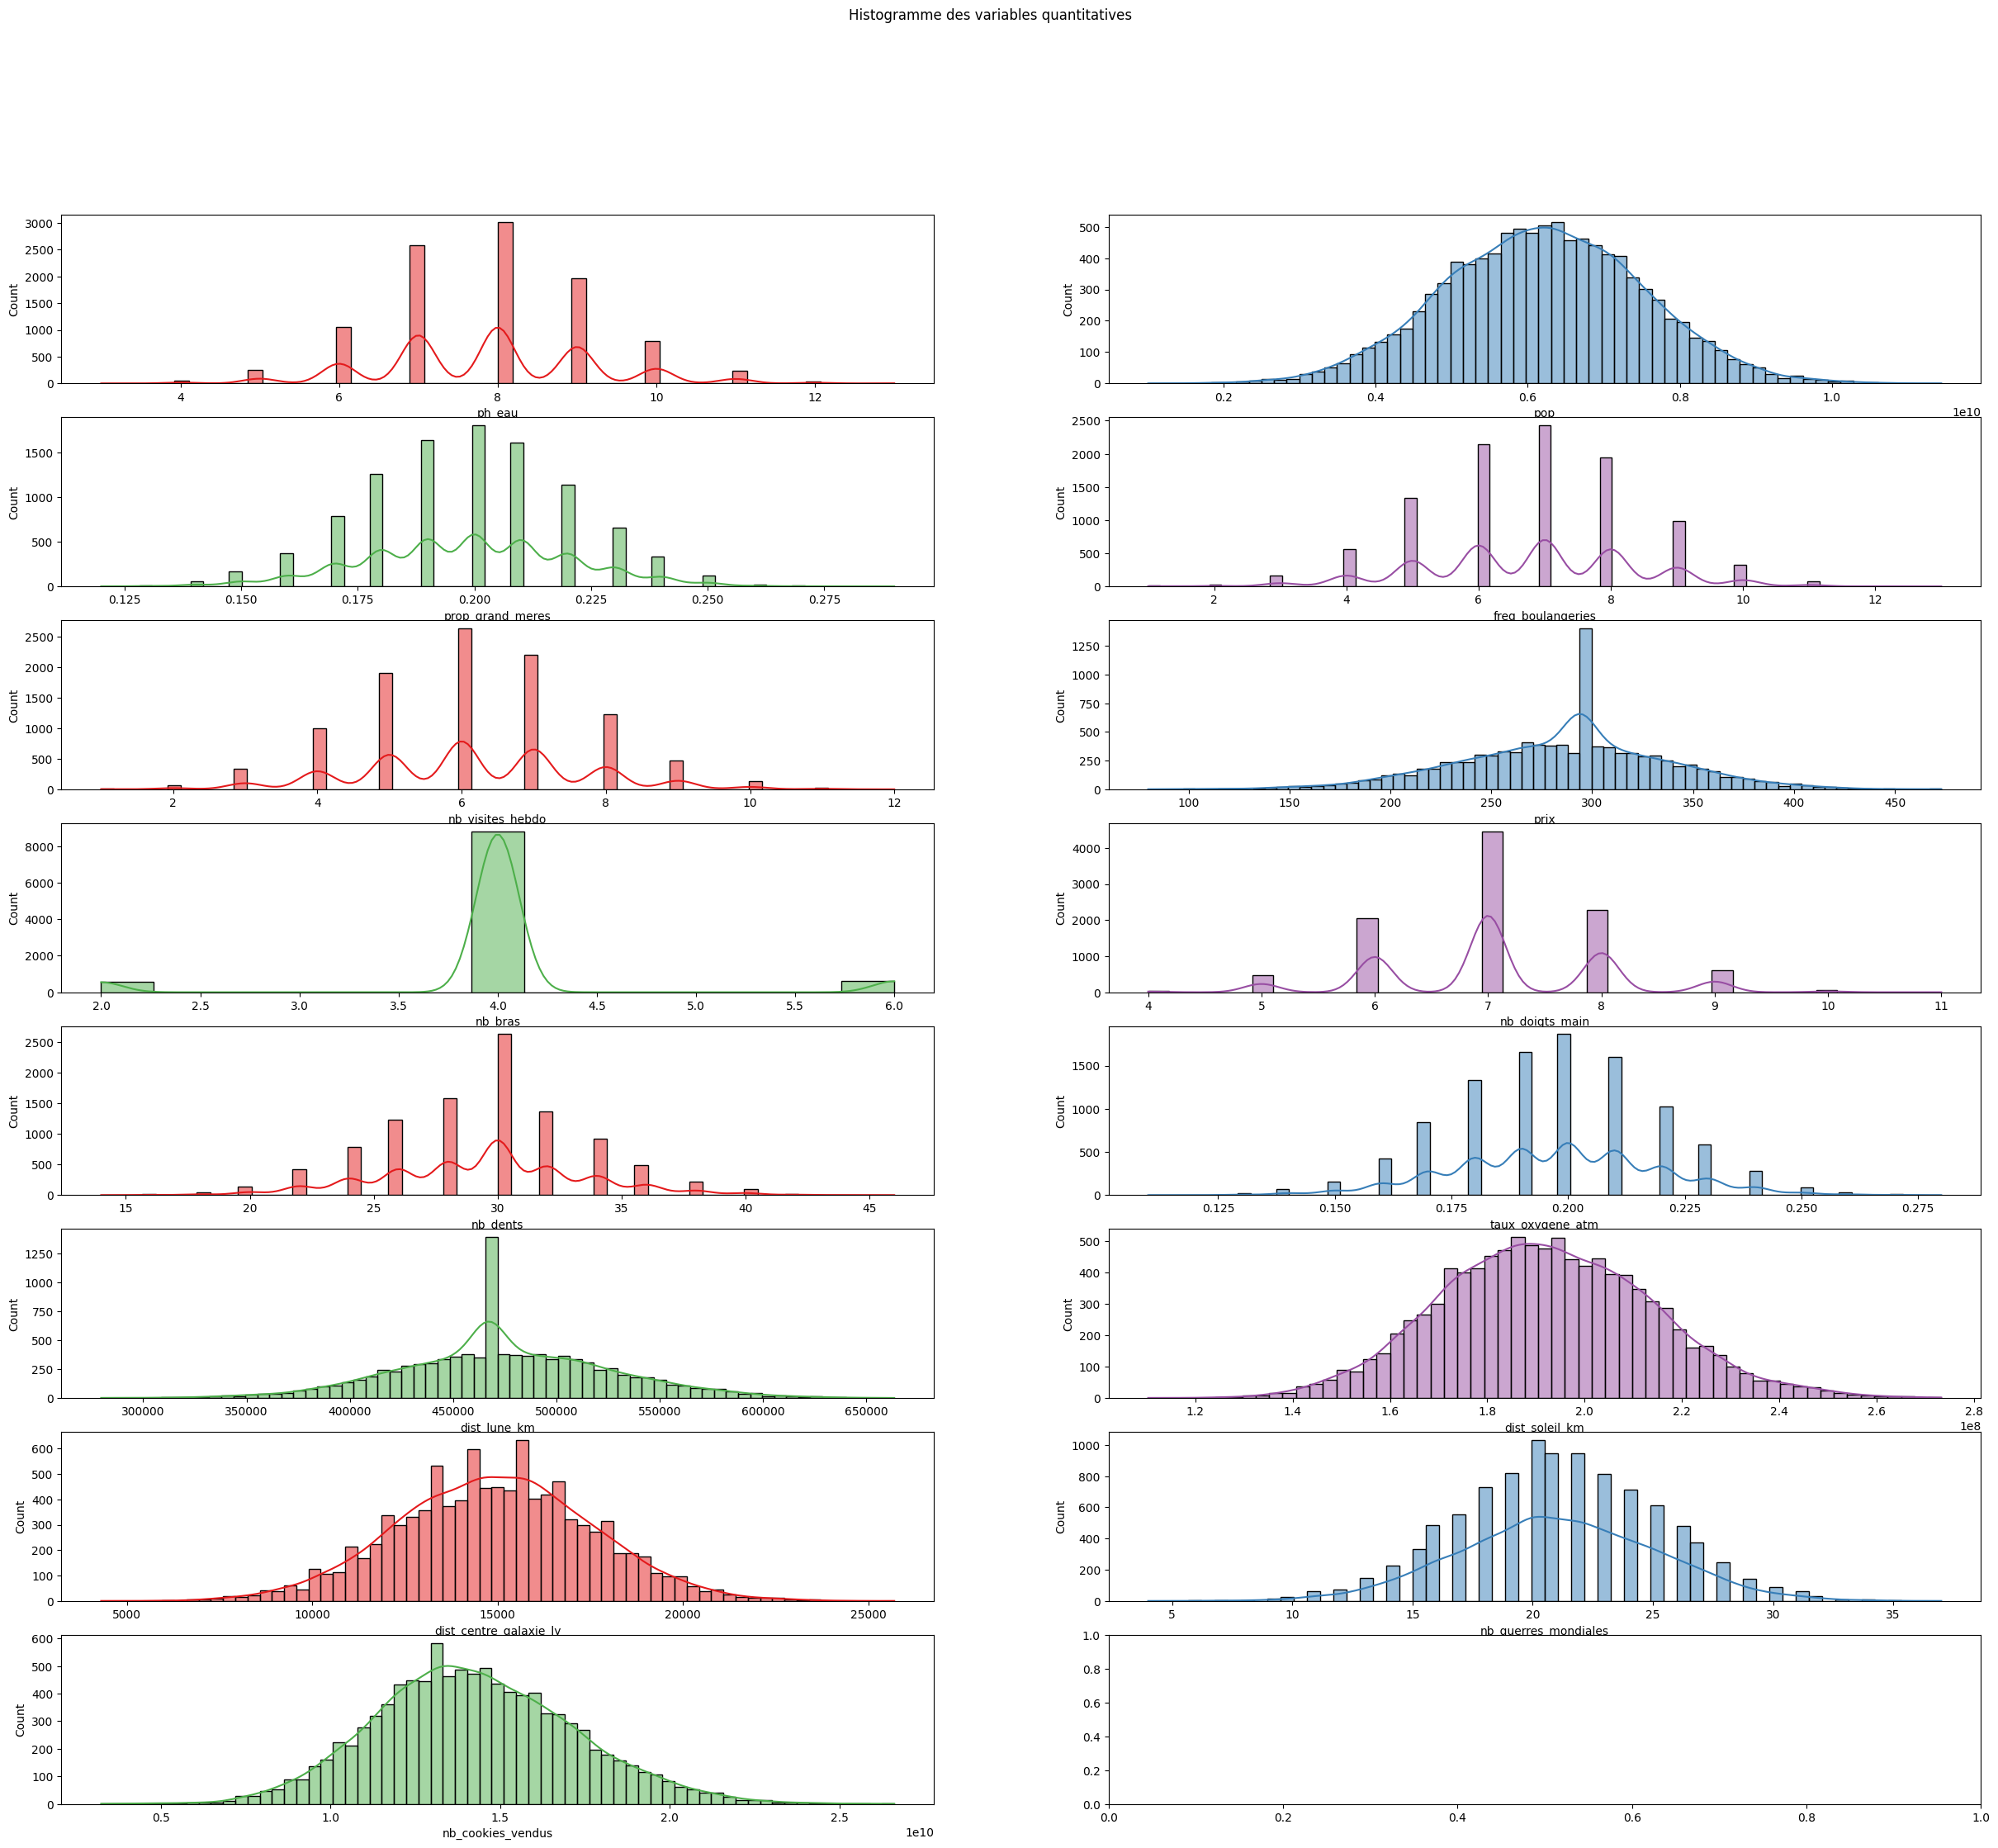

In [ ]:
#kde=True pour avoir la densité en plus de l'histogramme
fig, ax = plt.subplots(8,2,figsize=(30, 25))
fig.suptitle('Histogramme des variables quantitatives')
sns.histplot(data=var_quanti, x="ph_eau", color="#e41a1c", kde=True, ax=ax[0,0])
sns.histplot(data=var_quanti, x="pop", color="#377eb8", kde=True, ax=ax[0,1])
sns.histplot(data=var_quanti, x="prop_grand_meres", color="#4daf4a", kde=True, ax=ax[1,0])
sns.histplot(data=var_quanti, x="freq_boulangeries", color="#984ea3", kde=True, ax=ax[1,1])
sns.histplot(data=var_quanti, x="nb_visites_hebdo", color="#e41a1c", kde=True, ax=ax[2,0])
sns.histplot(data=var_quanti, x="prix", color="#377eb8", kde=True, ax=ax[2,1])
sns.histplot(data=var_quanti, x="nb_bras", color="#4daf4a", kde=True, ax=ax[3,0])
sns.histplot(data=var_quanti, x="nb_doigts_main", color="#984ea3", kde=True, ax=ax[3,1])
sns.histplot(data=var_quanti, x="nb_dents", color="#e41a1c", kde=True, ax=ax[4,0])
sns.histplot(data=var_quanti, x="taux_oxygene_atm", color="#377eb8", kde=True, ax=ax[4,1])
sns.histplot(data=var_quanti, x="dist_lune_km", color="#4daf4a", kde=True, ax=ax[5,0])
sns.histplot(data=var_quanti, x="dist_soleil_km", color="#984ea3", kde=True, ax=ax[5,1])
sns.histplot(data=var_quanti, x="dist_centre_galaxie_ly", color="#e41a1c", kde=True, ax=ax[6,0])
sns.histplot(data=var_quanti, x="nb_guerres_mondiales", color="#377eb8", kde=True, ax=ax[6,1])
sns.histplot(data=var_quanti, x="nb_cookies_vendus", color="#4daf4a", kde=True, ax=ax[7,0])
plt.show()

On peut voir la présence de quelques valeurs aberrantes sur les différentes distributions. On peut voir que les deux variables citées ci-dessus suivent bien une loi normale.

### Valeurs aberrantes


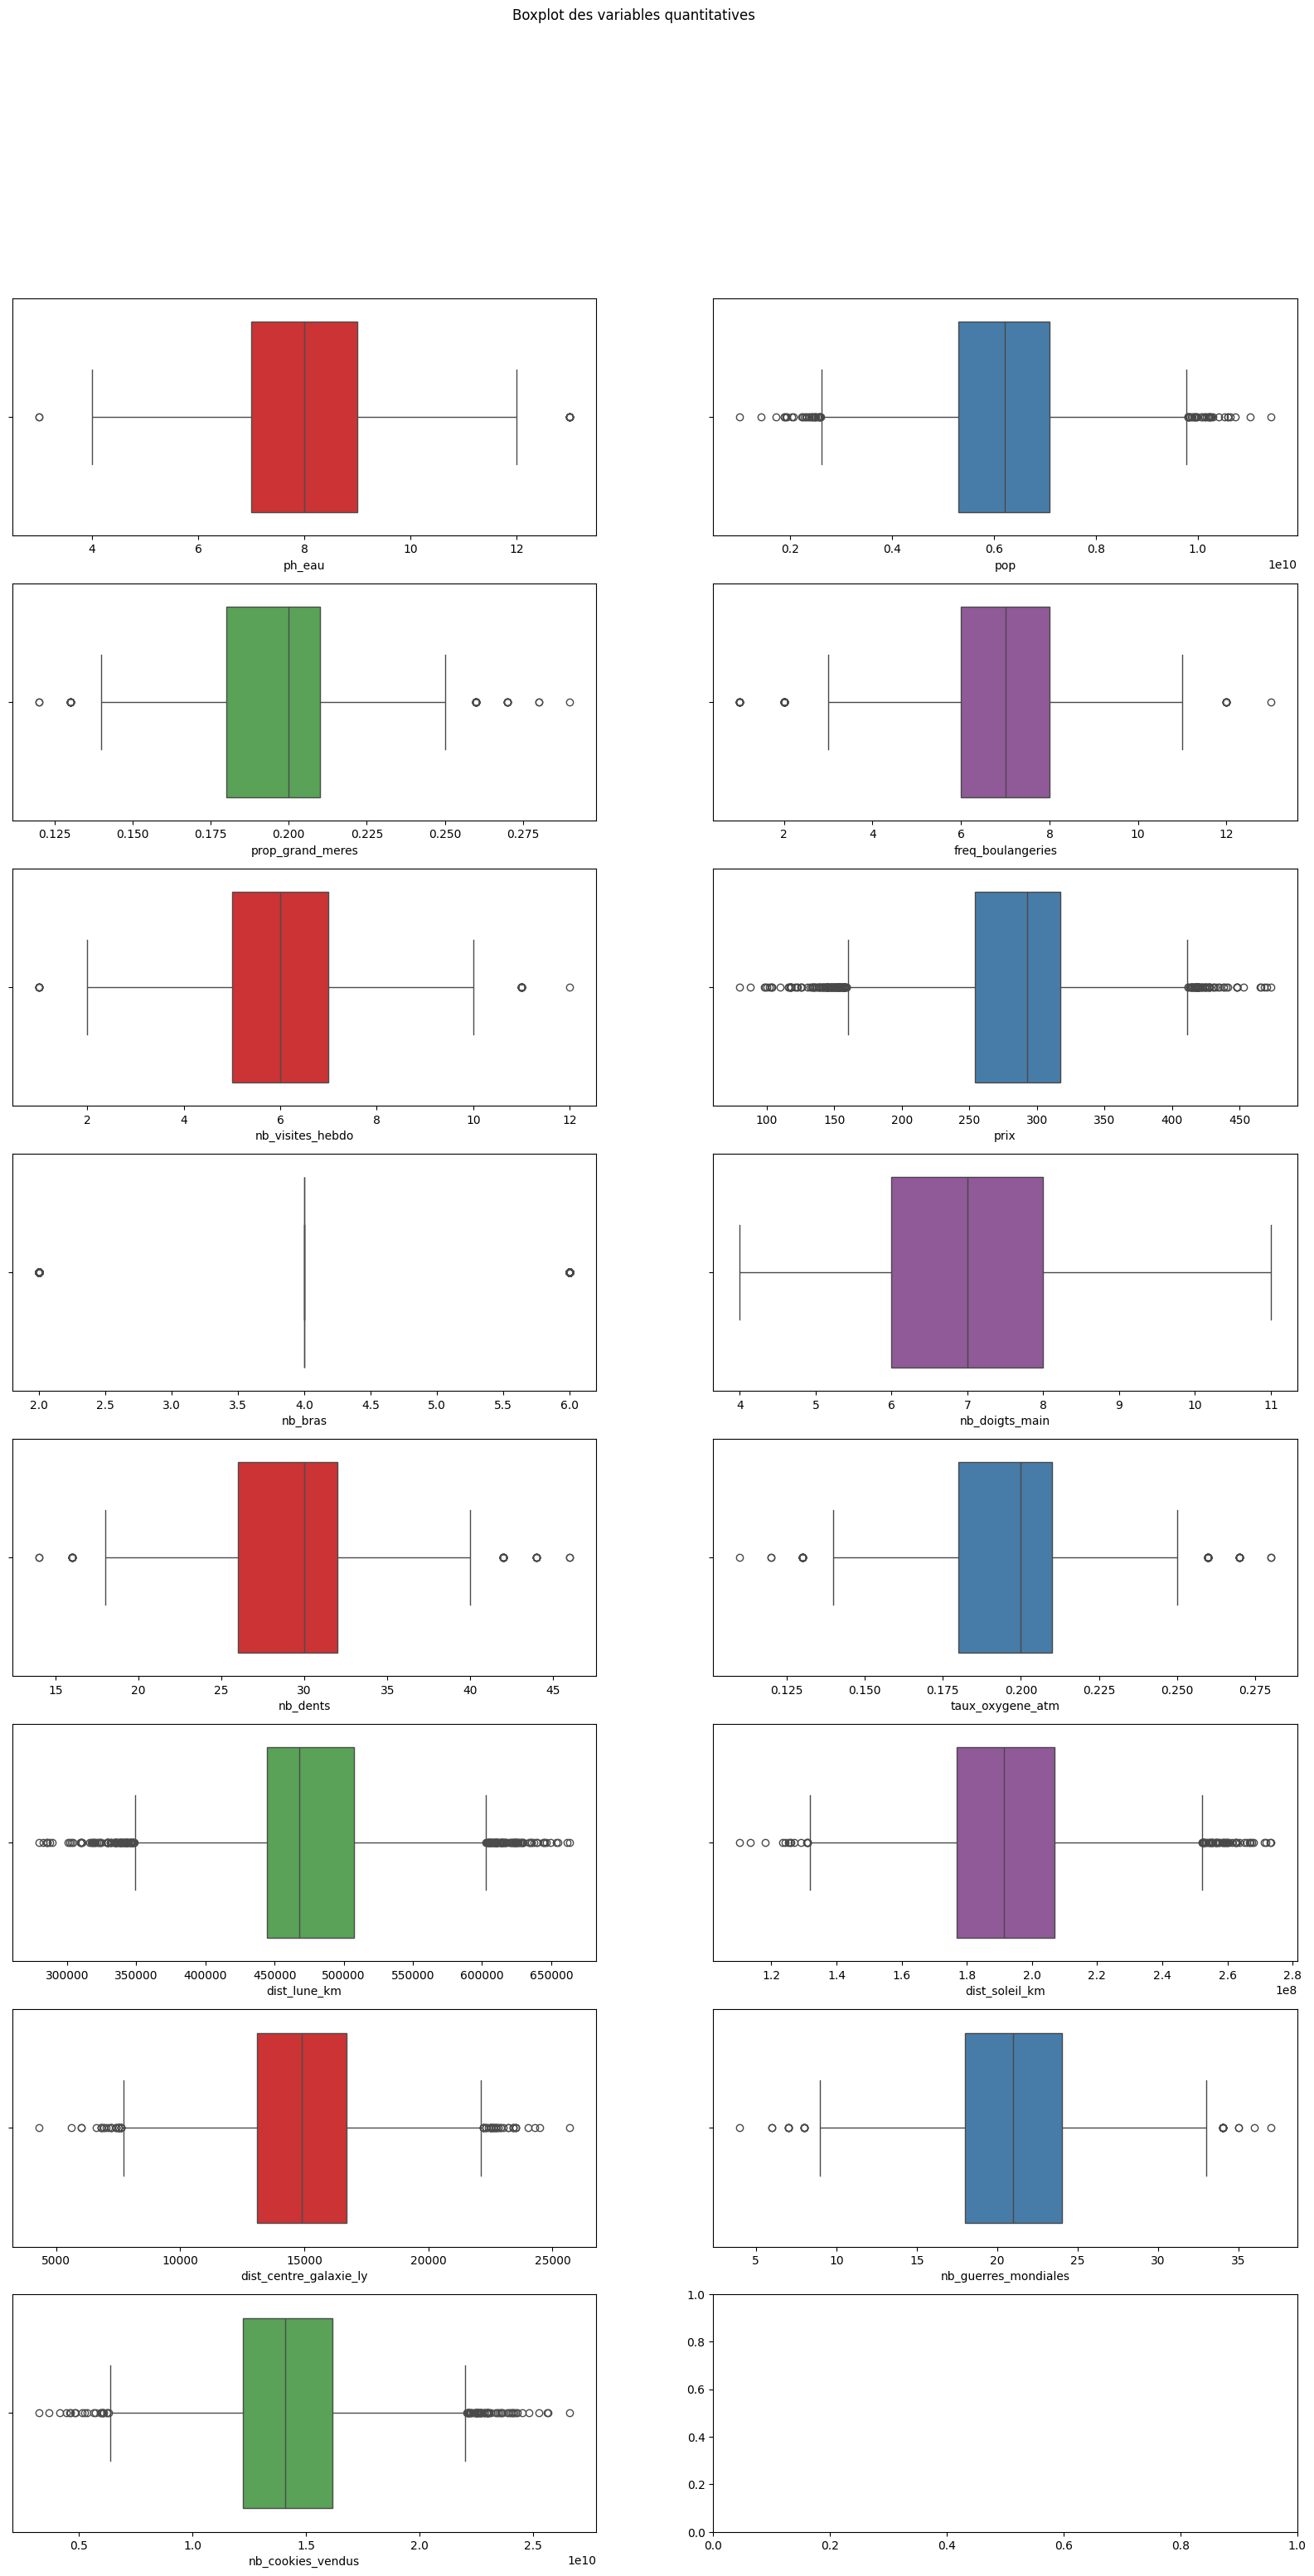

In [ ]:
#boxplot des variables quantitatives:

fig, ax = plt.subplots(8,2,figsize=(20, 35))
fig.suptitle('Boxplot des variables quantitatives')
sns.boxplot(data=var_quanti, x="ph_eau", color="#e41a1c", ax=ax[0,0])
sns.boxplot(data=var_quanti, x="pop", color="#377eb8", ax=ax[0,1])
sns.boxplot(data=var_quanti, x="prop_grand_meres", color="#4daf4a", ax=ax[1,0])
sns.boxplot(data=var_quanti, x="freq_boulangeries", color="#984ea3", ax=ax[1,1])
sns.boxplot(data=var_quanti, x="nb_visites_hebdo", color="#e41a1c", ax=ax[2,0])
sns.boxplot(data=var_quanti, x="prix", color="#377eb8", ax=ax[2,1])
sns.boxplot(data=var_quanti, x="nb_bras", color="#4daf4a", ax=ax[3,0])
sns.boxplot(data=var_quanti, x="nb_doigts_main", color="#984ea3", ax=ax[3,1])
sns.boxplot(data=var_quanti, x="nb_dents", color="#e41a1c", ax=ax[4,0])
sns.boxplot(data=var_quanti, x="taux_oxygene_atm", color="#377eb8", ax=ax[4,1])
sns.boxplot(data=var_quanti, x="dist_lune_km", color="#4daf4a", ax=ax[5,0])
sns.boxplot(data=var_quanti, x="dist_soleil_km", color="#984ea3", ax=ax[5,1])
sns.boxplot(data=var_quanti, x="dist_centre_galaxie_ly", color="#e41a1c", ax=ax[6,0])
sns.boxplot(data=var_quanti, x="nb_guerres_mondiales", color="#377eb8", ax=ax[6,1])
sns.boxplot(data=var_quanti, x="nb_cookies_vendus", color="#4daf4a", ax=ax[7,0])

# Affichez les graphiques
plt.show()

Ces graphiques représentent les boîtes à moustache des différentes variables quantitatives. On voit qu'il y a tout de même de nombreuses valeurs aberrantes. Nous allons les corriger.

In [ ]:
# Calcul de l'écart interquartile (IQR) pour chaque variable
Q1 = var_quanti.quantile(0.25)
Q3 = var_quanti.quantile(0.75)
IQR = Q3 - Q1

# Seuil pour considérer les valeurs comme atypiques (1,5 fois l'IQR)
seuil_atypique = 1.5

# Identification des indices des valeurs atypiques pour chaque variable
indices_atypiques = ((var_quanti < (Q1 - seuil_atypique * IQR)) | (var_quanti > (Q3 + seuil_atypique * IQR))).any(axis=1)

# Affichage des lignes du DataFrame qui contiennent des valeurs atypiques
print(var_quanti[indices_atypiques])

      ph_eau           pop  prop_grand_meres  freq_boulangeries  \
0        7.0  9.848993e+09              0.18                7.0   
1        9.0  6.756574e+09              0.19                9.0   
2        7.0  6.844275e+09              0.23                7.0   
8        9.0  7.058272e+09              0.23                6.0   
11       6.0  6.192924e+09              0.19                7.0   
...      ...           ...               ...                ...   
9982     9.0  6.630224e+09              0.18                6.0   
9983     8.0  6.635785e+09              0.20                6.0   
9985     6.0  8.332227e+09              0.20                5.0   
9987     8.0  5.540012e+09              0.20                5.0   
9988     9.0  5.674450e+09              0.23                6.0   

      nb_visites_hebdo   prix  nb_bras  nb_doigts_main  nb_dents  \
0                  6.0  341.0      6.0             7.0      30.0   
1                  9.0  420.0      4.0             9.0     

Il y a environ 1910 observations contenant des valeurs aberrantes sur 10 000 observations.

In [ ]:
# Remplacement des valeurs atypiques par la médiane de chaque variable
quanti_corrected = var_quanti.copy()
quanti_corrected[indices_atypiques] = var_quanti.median()

# Affichage du DataFrame corrigé
print(quanti_corrected)

      ph_eau           pop  prop_grand_meres  freq_boulangeries  \
0        8.0  6.210690e+09              0.20                7.0   
1        8.0  6.210690e+09              0.20                7.0   
2        8.0  6.210690e+09              0.20                7.0   
3        8.0  5.936420e+09              0.21                8.0   
4        8.0  7.091348e+09              0.18                6.0   
...      ...           ...               ...                ...   
9995     7.0  8.082718e+09              0.22                5.0   
9996     8.0  5.976373e+09              0.19                6.0   
9997     7.0  4.876728e+09              0.22                8.0   
9998     6.0  6.480782e+09              0.17                8.0   
9999     9.0  7.034239e+09              0.19                8.0   

      nb_visites_hebdo   prix  nb_bras  nb_doigts_main  nb_dents  \
0                  6.0  293.0      4.0             7.0      30.0   
1                  6.0  293.0      4.0             7.0     

La limite de cette méthode en utilisant un seuil à 1.5 fois l'écart interquartile est la prise en compte de valeurs considérées non aberrantes ou pour d'autres variables, de ne pas prendre en compte toutes les valeurs aberrantes. Nous allons tout de même continuer l'analyse avec cette méthode.

### Analyse des corrélations

<Axes: >

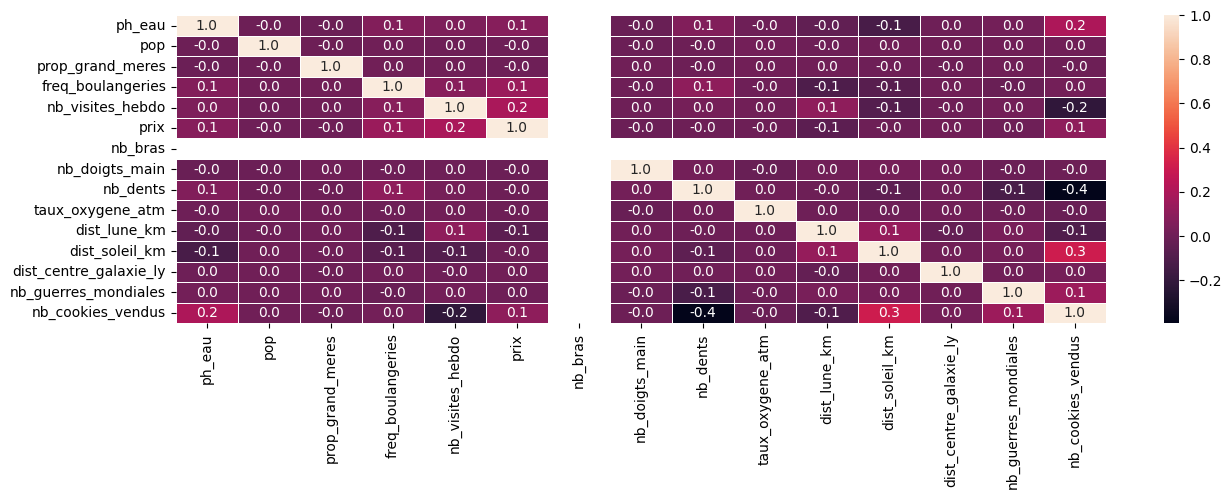

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(15, 4))
sns.heatmap(quanti_corrected.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

D'après la matrice ci-dessus, on constate qu'il n'y a aucune variable fortement corrélée. On peut donc toutes les garder pour la suite de l'analyse. On voit qu'il y a une variable dont il n'y a aucune corrélation. C'est celle de la variable 'nb_bras'. En effet en supprimant les valeurs aberrantes celle-ci à conserver uniquement des observations contenant la même valeur. Il est donc impossible de faire une analyse de corrélation dans ce cas-ci.

### Tests de chi-deux pour les variables qualitatives

In [ ]:
# Sélecion des variables qualitatives
quali = ['prec_noix', 'prec_chocolat', 'prec_noisettes', 'prec_raisins', 'prec_fruits_confits', 'prec_lait', 'niveau_techno', 'methode_cuisson', 'cookie_quality']

# Créez un nouveau dataframe avec seulement les variables qualitatives
var_quali = trainImputed.loc[:, quali]

# On réajuste le type des variables en category.
for col in var_quali.columns:
    if var_quali[col].dtype == 'object':
        var_quali[col] = var_quali[col].astype('category')

var_quali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   prec_noix            10000 non-null  category
 1   prec_chocolat        10000 non-null  category
 2   prec_noisettes       10000 non-null  category
 3   prec_raisins         10000 non-null  category
 4   prec_fruits_confits  10000 non-null  category
 5   prec_lait            10000 non-null  category
 6   niveau_techno        10000 non-null  category
 7   methode_cuisson      10000 non-null  category
 8   cookie_quality       10000 non-null  category
dtypes: category(9)
memory usage: 89.6 KB


In [ ]:
from scipy.stats import chi2_contingency


# Création d'un tableau pour stocker les résultats (dépendant ou non)
dependency_table = pd.DataFrame(index=var_quali.columns, columns=var_quali.columns)

# Test du chi-deux pour chaque paire de variables
for col1 in var_quali.columns:
    for col2 in var_quali.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(var_quali[col1], var_quali[col2])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            dependency_table.loc[col1, col2] = "Oui" if p < 0.05 else "Non"

# Affichage du tableau des résultats de dépendance
print("Tableau des résultats de dépendance entre les variables (seuil=0.05) :")
dependency_table

Tableau des résultats de dépendance entre les variables (seuil=0.05) :


,prec_noix,prec_chocolat,prec_noisettes,prec_raisins,prec_fruits_confits,prec_lait,niveau_techno,methode_cuisson,cookie_quality
prec_noix,NaN,Oui,Non,Oui,Oui,Oui,Non,Non,Oui
prec_chocolat,Oui,NaN,Oui,Oui,Non,Non,Oui,Oui,Oui
prec_noisettes,Non,Oui,NaN,Oui,Oui,Non,Oui,Oui,Oui
prec_raisins,Oui,Oui,Oui,NaN,Oui,Oui,Oui,Oui,Oui
prec_fruits_confits,Oui,Non,Oui,Oui,NaN,Non,Oui,Oui,Oui
prec_lait,Oui,Non,Non,Oui,Non,NaN,Oui,Oui,Oui
niveau_techno,Non,Oui,Oui,Oui,Oui,Oui,NaN,Oui,Oui
methode_cuisson,Non,Oui,Oui,Oui,Oui,Oui,Oui,NaN,Non
cookie_quality,Oui,Oui,Oui,Oui,Oui,Oui,Oui,Non,NaN


On remarque qu'il y a beaucoup de relations de dépendance entre les variables explicatives qualitatives. La variables prec_raisins est dépendante avec toutes les variables. Il semblerait judicieux d'éliminer des variables pour ne pas compromettre les performances des modèles par un surplus d'information. Mais cela signifierait de toutes les supprimer ou du moins une grande partie. Nous allons de tout de même garder chaque variables pour la suite de l'analyse.

On peut observer que la variable cible 'cookie_quality' est dépendante de toutes les variables sauf celle de la méthode de cuisson. Ceci prouve donc que les variables explicatives choisies (hormi une) peuvent avoir un pouvoir explicative sur le comportement de la variable cible.

## Préparation de la base de données

### Standardisation

In [ ]:
# Standardisation des variables quantitatives
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_quanti = pd.DataFrame(scaler.fit_transform(quanti_corrected), columns=quanti_corrected.columns)

On standardise les variables quantitatives pour supprimer les différences d'échelle et faciliter le temps de calcul lors des modélisations. Certains modèles de machine learning peuvent être sensible au niveau d'échelle. On standardise pour être sûr de ne pas avoir de soucis.

### Encodage des variables qualitatives

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_encoded = var_quali.copy()
# création d'une boucle pour encoder chaque variable avec LabelEncoder
label_encoder = LabelEncoder()
for col in var_encoded.columns:
    var_encoded[col] = label_encoder.fit_transform(var_quali[col])

var_encoded.head(5)

,prec_noix,prec_chocolat,prec_noisettes,prec_raisins,prec_fruits_confits,prec_lait,niveau_techno,methode_cuisson,cookie_quality
0,0,0,0,0,1,1,3,8,0
1,1,1,1,1,1,0,0,0,1
2,1,1,0,0,0,0,4,5,0
3,0,0,1,0,0,1,5,1,1
4,1,1,0,1,1,0,2,6,1


### Création de la base contenant les variables qualitatives et quantitatives

In [ ]:
#Concaténation des variables qualitatives et quantitatives
base = pd.concat([var_encoded, scaled_quanti], axis=1)
base

,prec_noix,prec_chocolat,prec_noisettes,prec_raisins,prec_fruits_confits,prec_lait,niveau_techno,methode_cuisson,cookie_quality,ph_eau,...,prix,nb_bras,nb_doigts_main,nb_dents,taux_oxygene_atm,dist_lune_km,dist_soleil_km,dist_centre_galaxie_ly,nb_guerres_mondiales,nb_cookies_vendus
0,0,0,0,0,1,1,3,8,0,0.084663,...,0.131571,0.0,-0.050526,0.139034,0.115697,-0.130046,-0.017807,-0.008551,-0.010154,-0.043418
1,1,1,1,1,1,0,0,0,1,0.084663,...,0.131571,0.0,-0.050526,0.139034,0.115697,-0.130046,-0.017807,-0.008551,-0.010154,-0.043418
2,1,1,0,0,0,0,4,5,0,0.084663,...,0.131571,0.0,-0.050526,0.139034,0.115697,-0.130046,-0.017807,-0.008551,-0.010154,-0.043418
3,0,0,1,0,0,1,5,1,1,0.084663,...,-0.311241,0.0,-0.050526,-0.978599,-1.449181,-0.590286,1.238751,0.771561,-0.283115,0.562120
4,1,1,0,1,1,0,2,6,1,0.084663,...,1.460008,0.0,-0.050526,0.697850,0.115697,-0.143993,-0.738093,-1.525434,-1.374960,-0.286430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,1,1,6,2,1,-0.751101,...,-1.406619,0.0,-0.050526,-0.419783,0.115697,-0.143993,-0.259655,-0.225249,-0.556076,1.052128
9996,1,1,1,0,1,1,0,0,1,0.084663,...,-0.730748,0.0,-1.191067,-0.978599,0.637323,0.502203,1.117827,-1.048700,-1.647921,1.135788
9997,1,1,1,1,1,0,1,5,1,-0.751101,...,0.947278,0.0,-0.050526,0.697850,-1.449181,0.709078,-0.974683,0.858240,-0.829038,-0.545378
9998,0,1,0,1,0,0,4,3,1,-1.586864,...,0.737525,0.0,-0.050526,-0.419783,-0.405929,0.590532,0.586813,-2.088848,-0.283115,-0.915871


Les variables inutiles correspondant à l'identifiant, le nom de la planète, la date de découverte et celui qui l'a découvert, ont été supprimées durant cette opération.

In [ ]:
#Séparation des variables indépendantes (X) et de la variable cible (y)
X_train = base.drop('cookie_quality', axis=1)
y_train = base['cookie_quality']

### Réajustement de la classe minoritaire

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Redressage de l'échantillon train_base_b par oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

Ayant un déséquilibre dans la répartition des deux modalités de la variable cible, nous avons décidé de réajuster la classe minoritaire à celle la plus importante pour améliorer l'apprentissage des modèles. En effet avoir plus d'observations de la classe minoritaire permettra de faire de meilleurs prédictions.

In [ ]:
# Concaténation des données resamplées pour créer un DataFrame avec la variable cible
resampled_base = pd.DataFrame(X_train_resampled.copy(), columns=X_train.columns)
resampled_base['cookie_quality'] = y_train_resampled
resampled_base

,prec_noix,prec_chocolat,prec_noisettes,prec_raisins,prec_fruits_confits,prec_lait,niveau_techno,methode_cuisson,ph_eau,pop,...,nb_bras,nb_doigts_main,nb_dents,taux_oxygene_atm,dist_lune_km,dist_soleil_km,dist_centre_galaxie_ly,nb_guerres_mondiales,nb_cookies_vendus,cookie_quality
0,0,0,0,0,1,1,3,8,0.084663,-0.000921,...,0.0,-0.050526,0.139034,0.115697,-0.130046,-0.017807,-0.008551,-0.010154,-0.043418,0
1,1,1,1,1,1,0,0,0,0.084663,-0.000921,...,0.0,-0.050526,0.139034,0.115697,-0.130046,-0.017807,-0.008551,-0.010154,-0.043418,1
2,1,1,0,0,0,0,4,5,0.084663,-0.000921,...,0.0,-0.050526,0.139034,0.115697,-0.130046,-0.017807,-0.008551,-0.010154,-0.043418,0
3,0,0,1,0,0,1,5,1,0.084663,-0.241726,...,0.0,-0.050526,-0.978599,-1.449181,-0.590286,1.238751,0.771561,-0.283115,0.562120,1
4,1,1,0,1,1,0,2,6,0.084663,0.772283,...,0.0,-0.050526,0.697850,0.115697,-0.143993,-0.738093,-1.525434,-1.374960,-0.286430,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,0,1,1,0,0,1,1,5,-0.751101,-1.474609,...,0.0,2.230556,0.139034,-0.405929,1.194887,0.712994,-2.348885,1.081690,-0.393993,0
13936,0,0,0,1,0,0,3,8,0.084663,1.579188,...,0.0,-0.050526,0.139034,-0.405929,1.292514,0.781343,1.551672,1.627613,-0.621070,0
13937,1,1,1,0,0,1,6,2,-0.751101,-0.714217,...,0.0,-0.050526,-1.537415,-0.405929,-0.248593,0.276617,0.381505,-1.101999,-0.019515,0
13938,0,0,0,1,0,1,0,0,-1.586864,0.171884,...,0.0,-0.050526,1.815482,-0.927555,1.018230,1.186175,-0.701983,1.354652,-1.290349,0


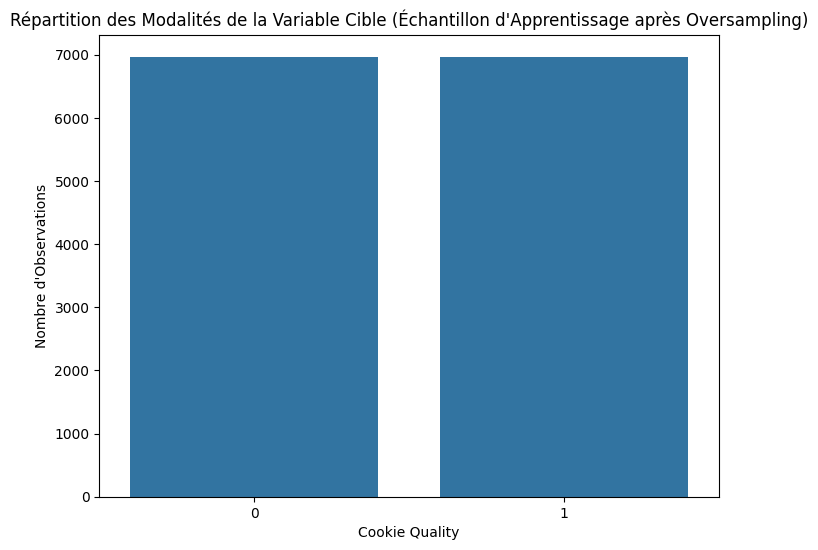

In [ ]:
# Tracer un diagramme à barres pour la répartition des modalités de la variable cible
plt.figure(figsize=(8, 6))
sns.countplot(x='cookie_quality', data=resampled_base)
plt.title('Répartition des Modalités de la Variable Cible (Échantillon d\'Apprentissage après Oversampling)')
plt.xlabel('Cookie Quality')
plt.ylabel('Nombre d\'Observations')
plt.show()

L'échantillon est rééquilibré.

### Réajustement de la base de données

In [ ]:
# Utiliser train_test_split avec stratify pour conserver la proportion des classes
from sklearn.model_selection import train_test_split
df_train, df_remainder = train_test_split(resampled_base, test_size=3940, random_state=42, stratify=resampled_base['cookie_quality'])
df_train

,prec_noix,prec_chocolat,prec_noisettes,prec_raisins,prec_fruits_confits,prec_lait,niveau_techno,methode_cuisson,ph_eau,pop,...,nb_bras,nb_doigts_main,nb_dents,taux_oxygene_atm,dist_lune_km,dist_soleil_km,dist_centre_galaxie_ly,nb_guerres_mondiales,nb_cookies_vendus,cookie_quality
2532,1,0,0,0,0,1,1,5,0.084663,0.061764,...,0.0,-0.050526,1.815482,-0.927555,0.776487,-0.249140,-0.658644,-0.283115,-1.927757,1
10239,0,1,0,1,0,1,0,0,-0.751101,0.262003,...,0.0,-0.050526,-0.419783,-0.405929,0.004772,-1.605591,-0.571965,-0.829038,-2.254429,0
10877,1,1,0,1,0,1,1,5,0.084663,-0.000921,...,0.0,-0.050526,0.139034,0.115697,-0.130046,-0.017807,-0.008551,-0.010154,-0.043418,0
1073,0,0,0,1,0,1,4,3,-2.422627,2.146632,...,0.0,-0.050526,-0.978599,1.158949,-0.532175,-0.753866,-0.095230,-1.374960,-0.354155,1
3564,1,1,0,1,0,1,6,2,0.084663,-0.000921,...,0.0,-0.050526,0.139034,0.115697,-0.130046,-0.017807,-0.008551,-0.010154,-0.043418,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,0,0,0,1,0,0,5,4,0.084663,-1.607583,...,0.0,-0.050526,-1.537415,-1.970807,-2.170909,-0.180791,0.338165,-0.010154,1.422621,1
5033,1,1,0,1,0,0,4,3,0.084663,-1.909682,...,0.0,-0.050526,0.139034,-1.449181,0.088452,1.123084,0.511523,-0.010154,0.135853,0
12693,0,1,0,1,0,1,2,6,-0.751101,1.183279,...,0.0,-0.050526,0.139034,0.115697,0.755567,0.492177,-0.268588,0.808729,-1.393928,0
12582,0,0,1,1,0,0,2,6,-0.751101,0.553725,...,0.0,-0.050526,0.139034,-0.405929,-0.171886,0.429086,0.858240,2.173535,-0.119111,0


In [ ]:
# Enregistrez le dataframe au format CSV dans Google Drive
#df_train.to_csv('/content/drive/My Drive/df_train.csv', index=False)

## **2-Préparation base de données de l'échantillon Test**

In [ ]:
chemin_fichier_test = '/content/drive/MyDrive/test.csv'
test = pd.read_csv(chemin_fichier_test, sep=",")
test.head(5)

,id,earthName,dateOfDiscovery,discovererName,prec_noix,prec_chocolat,prec_noisettes,prec_raisins,prec_fruits_confits,prec_lait,...,nb_doigts_main,nb_dents,taux_oxygene_atm,dist_lune_km,dist_soleil_km,dist_centre_galaxie_ly,niveau_techno,nb_guerres_mondiales,methode_cuisson,nb_cookies_vendus
0,98,Earth193,2172-04-12,Brian Ledford,oui,oui,non,oui,oui,oui,...,7.0,32.0,0.23,526400.0,158700000,14800,future,16.0,Micro-Ondes,1.317000e+10
1,257,Earth453,2145-12-07,Mary Rangel,non,oui,oui,oui,non,oui,...,6.0,32.0,0.20,NaN,179200000,18100,industriel,24.0,Poele,1.023000e+10
2,279,Earth485,2084-05-19,Robert Miley,non,non,oui,oui,non,oui,...,8.0,30.0,0.21,NaN,203400000,17300,future,22.0,Quantique,1.477000e+10
3,280,Earth486,2199-10-03,Dennis Muller,non,oui,non,oui,non,oui,...,6.0,24.0,0.16,383900.0,223600000,12900,future,27.0,Micro-Ondes,1.864000e+10
4,363,Earth650,2086-01-17,Debra Rowland,non,non,oui,NaN,non,non,...,8.0,26.0,0.19,NaN,206800000,22300,apocalyptique,21.0,Fer à repasser,1.827000e+10


In [ ]:
#Vérification du nombre de lignes et de colonnes:
test.shape

#Il y a 2000 lignes pour 27 colonnes

(2000, 27)

Il y a une colonne de moins. La variable cible a été supprimée.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2000 non-null   int64  
 1   earthName               2000 non-null   object 
 2   dateOfDiscovery         2000 non-null   object 
 3   discovererName          2000 non-null   object 
 4   prec_noix               1804 non-null   object 
 5   prec_chocolat           1979 non-null   object 
 6   prec_noisettes          1957 non-null   object 
 7   prec_raisins            1715 non-null   object 
 8   prec_fruits_confits     1980 non-null   object 
 9   prec_lait               2000 non-null   object 
 10  ph_eau                  2000 non-null   int64  
 11  pop                     2000 non-null   int64  
 12  prop_grand_meres        2000 non-null   float64
 13  freq_boulangeries       2000 non-null   int64  
 14  nb_visites_hebdo        2000 non-null   

### Valeurs manquantes

In [ ]:
na_test = test.isna().sum()/test.shape[0]*100
na_test.sort_values()

id                         0.00
niveau_techno              0.00
dist_centre_galaxie_ly     0.00
dist_soleil_km             0.00
taux_oxygene_atm           0.00
nb_visites_hebdo           0.00
prop_grand_meres           0.00
pop                        0.00
ph_eau                     0.00
freq_boulangeries          0.00
earthName                  0.00
dateOfDiscovery            0.00
discovererName             0.00
prec_lait                  0.00
nb_bras                    0.75
nb_cookies_vendus          0.85
methode_cuisson            0.90
nb_guerres_mondiales       1.00
prec_fruits_confits        1.00
prec_chocolat              1.05
prec_noisettes             2.15
nb_dents                   9.55
prec_noix                  9.80
prix                      10.25
dist_lune_km              10.45
nb_doigts_main            10.70
prec_raisins              14.25
dtype: float64

Il y a également 13 variables qui possèdent des valeurs manquantes.

In [ ]:
#imputation sur les valeurs manquantes de l'échantillon test avec la même stratgie
from sklearn.impute import SimpleImputer

imp_test = SimpleImputer(missing_values=np.nan,
                    strategy='most_frequent',
                    )

testImputed = pd.DataFrame(
    imp_test.fit_transform(test),
    columns=test.columns
    )

testImputed.head(5)

,id,earthName,dateOfDiscovery,discovererName,prec_noix,prec_chocolat,prec_noisettes,prec_raisins,prec_fruits_confits,prec_lait,...,nb_doigts_main,nb_dents,taux_oxygene_atm,dist_lune_km,dist_soleil_km,dist_centre_galaxie_ly,niveau_techno,nb_guerres_mondiales,methode_cuisson,nb_cookies_vendus
0,98,Earth193,2172-04-12,Brian Ledford,oui,oui,non,oui,oui,oui,...,7.0,32.0,0.23,526400.0,158700000,14800,future,16.0,Micro-Ondes,13170000000.0
1,257,Earth453,2145-12-07,Mary Rangel,non,oui,oui,oui,non,oui,...,6.0,32.0,0.2,457200.0,179200000,18100,industriel,24.0,Poele,10230000000.0
2,279,Earth485,2084-05-19,Robert Miley,non,non,oui,oui,non,oui,...,8.0,30.0,0.21,457200.0,203400000,17300,future,22.0,Quantique,14770000000.0
3,280,Earth486,2199-10-03,Dennis Muller,non,oui,non,oui,non,oui,...,6.0,24.0,0.16,383900.0,223600000,12900,future,27.0,Micro-Ondes,18640000000.0
4,363,Earth650,2086-01-17,Debra Rowland,non,non,oui,non,non,non,...,8.0,26.0,0.19,457200.0,206800000,22300,apocalyptique,21.0,Fer à repasser,18270000000.0


### Valeurs aberrantes

In [ ]:
#création d'une base ne comportant que les variables quantitatives:
var_quanti_test = testImputed.drop(columns=['id', 'earthName', 'dateOfDiscovery', 'discovererName', 'prec_noix', 'prec_chocolat', 'prec_noisettes', 'prec_raisins', 'prec_fruits_confits', 'prec_lait', 'niveau_techno', 'methode_cuisson'])
var_quanti_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ph_eau                  2000 non-null   object
 1   pop                     2000 non-null   object
 2   prop_grand_meres        2000 non-null   object
 3   freq_boulangeries       2000 non-null   object
 4   nb_visites_hebdo        2000 non-null   object
 5   prix                    2000 non-null   object
 6   nb_bras                 2000 non-null   object
 7   nb_doigts_main          2000 non-null   object
 8   nb_dents                2000 non-null   object
 9   taux_oxygene_atm        2000 non-null   object
 10  dist_lune_km            2000 non-null   object
 11  dist_soleil_km          2000 non-null   object
 12  dist_centre_galaxie_ly  2000 non-null   object
 13  nb_guerres_mondiales    2000 non-null   object
 14  nb_cookies_vendus       2000 non-null   object
dtypes: o

In [ ]:
# On réajuste les types des variables en valeur réelle.
for col in var_quanti_test.columns:
    if var_quanti_test[col].dtype == 'object':
        var_quanti_test[col] = var_quanti_test[col].astype('float64')

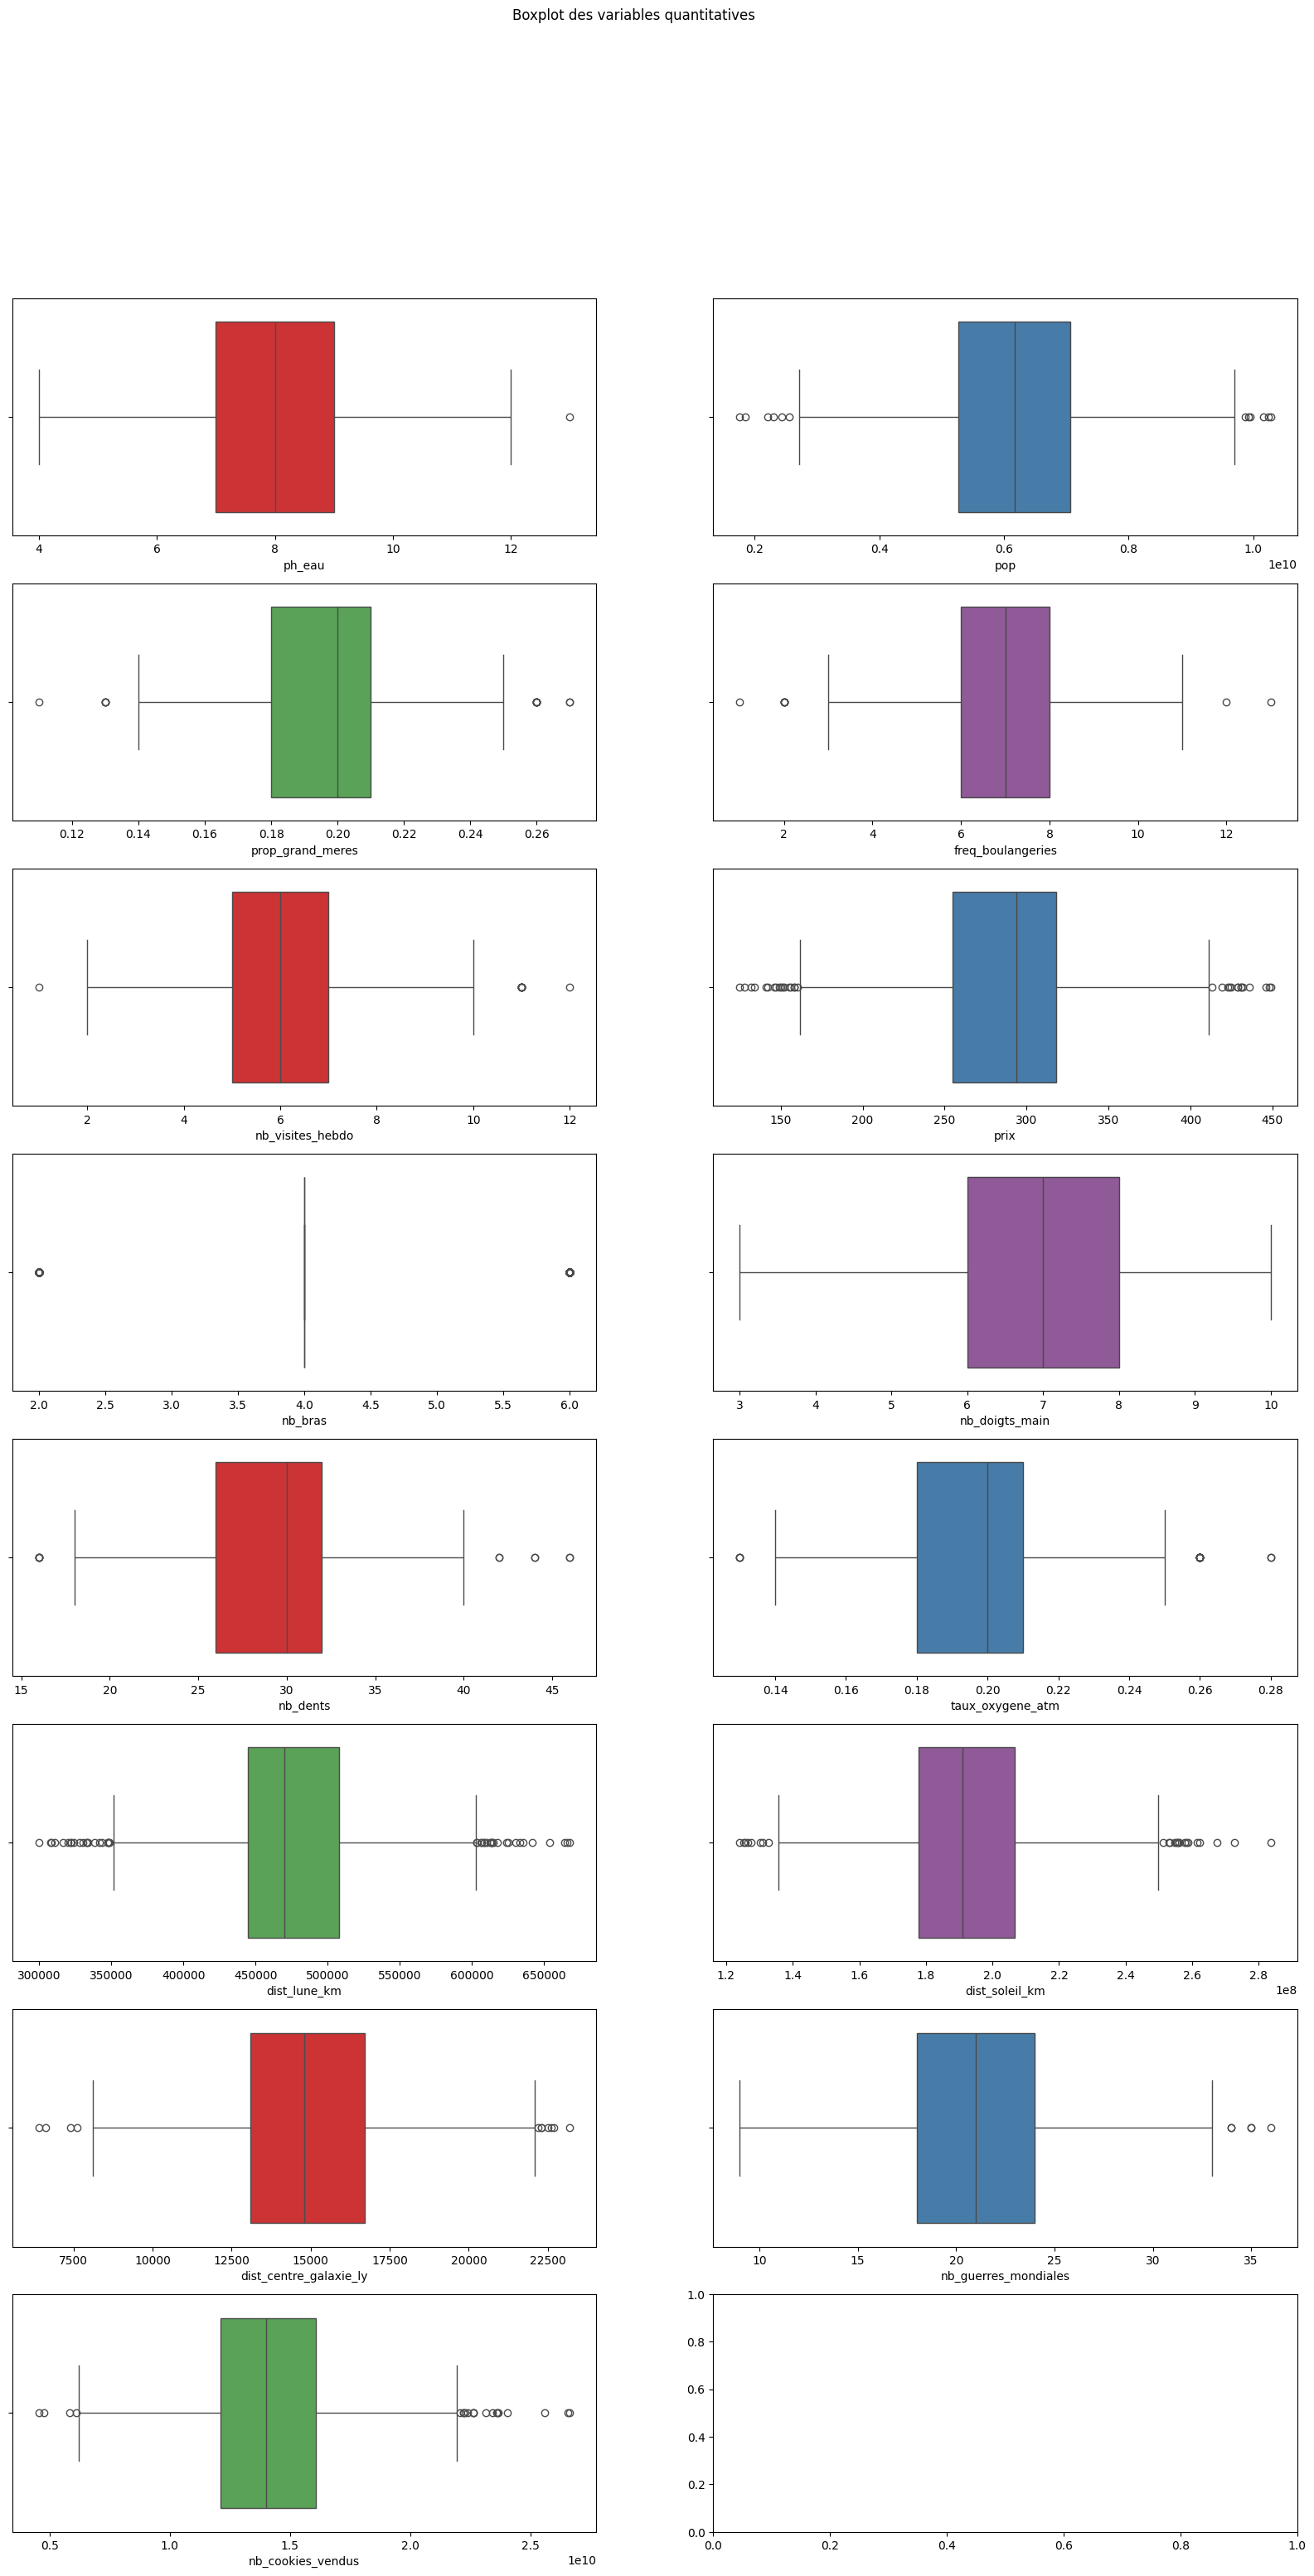

In [ ]:
#boxplot des variables quantitatives:

fig, ax = plt.subplots(8,2,figsize=(20, 35))
fig.suptitle('Boxplot des variables quantitatives')
sns.boxplot(data=var_quanti_test, x="ph_eau", color="#e41a1c", ax=ax[0,0])
sns.boxplot(data=var_quanti_test, x="pop", color="#377eb8", ax=ax[0,1])
sns.boxplot(data=var_quanti_test, x="prop_grand_meres", color="#4daf4a", ax=ax[1,0])
sns.boxplot(data=var_quanti_test, x="freq_boulangeries", color="#984ea3", ax=ax[1,1])
sns.boxplot(data=var_quanti_test, x="nb_visites_hebdo", color="#e41a1c", ax=ax[2,0])
sns.boxplot(data=var_quanti_test, x="prix", color="#377eb8", ax=ax[2,1])
sns.boxplot(data=var_quanti_test, x="nb_bras", color="#4daf4a", ax=ax[3,0])
sns.boxplot(data=var_quanti_test, x="nb_doigts_main", color="#984ea3", ax=ax[3,1])
sns.boxplot(data=var_quanti_test, x="nb_dents", color="#e41a1c", ax=ax[4,0])
sns.boxplot(data=var_quanti_test, x="taux_oxygene_atm", color="#377eb8", ax=ax[4,1])
sns.boxplot(data=var_quanti_test, x="dist_lune_km", color="#4daf4a", ax=ax[5,0])
sns.boxplot(data=var_quanti_test, x="dist_soleil_km", color="#984ea3", ax=ax[5,1])
sns.boxplot(data=var_quanti_test, x="dist_centre_galaxie_ly", color="#e41a1c", ax=ax[6,0])
sns.boxplot(data=var_quanti_test, x="nb_guerres_mondiales", color="#377eb8", ax=ax[6,1])
sns.boxplot(data=var_quanti_test, x="nb_cookies_vendus", color="#4daf4a", ax=ax[7,0])

# Affichez les graphiques
plt.show()

Les boxplots nous montrent que la majorité des variables possèdent des valeurs aberrantes. Nous allons les corriger de la même manière.

In [ ]:
# Calcul de l'écart interquartile (IQR) pour chaque variable
Q1 = var_quanti_test.quantile(0.25)
Q3 = var_quanti_test.quantile(0.75)
IQR = Q3 - Q1

# Seuil pour considérer les valeurs comme atypiques (1,5 fois l'IQR)
seuil_atypique = 1.5

# Identification des indices des valeurs atypiques pour chaque variable
indices_atypiques_test = ((var_quanti_test < (Q1 - seuil_atypique * IQR)) | (var_quanti_test > (Q3 + seuil_atypique * IQR))).any(axis=1)

# Affichage des lignes du DataFrame qui contiennent des valeurs atypiques
print(var_quanti_test[indices_atypiques_test])

      ph_eau           pop  prop_grand_meres  freq_boulangeries  \
4        7.0  7.534476e+09              0.18                4.0   
24       8.0  6.149732e+09              0.18                7.0   
25       7.0  6.911462e+09              0.20                6.0   
33      10.0  8.369556e+09              0.21                5.0   
35       9.0  5.132979e+09              0.18                4.0   
...      ...           ...               ...                ...   
1983     9.0  4.857556e+09              0.18                8.0   
1986     7.0  3.939804e+09              0.17                6.0   
1991    10.0  5.425506e+09              0.20                8.0   
1993     7.0  6.473080e+09              0.21                4.0   
1999     6.0  5.746784e+09              0.16                7.0   

      nb_visites_hebdo   prix  nb_bras  nb_doigts_main  nb_dents  \
4                  9.0  292.0      4.0             8.0      26.0   
24                 8.0  368.0      6.0             6.0     

Il y a environ 404 observations contenant des valeurs aberrantes.

In [ ]:
# Remplacement des valeurs atypiques par la médiane de chaque variable
quanti_corrected_test = var_quanti_test.copy()
quanti_corrected_test[indices_atypiques_test] = var_quanti_test.median()

# Affichage du DataFrame corrigé
print(quanti_corrected_test)

      ph_eau           pop  prop_grand_meres  freq_boulangeries  \
0        8.0  5.181729e+09              0.22                8.0   
1        7.0  7.060048e+09              0.20                7.0   
2        8.0  4.629677e+09              0.15                4.0   
3        8.0  8.203884e+09              0.21                4.0   
4        8.0  6.178152e+09              0.20                7.0   
...      ...           ...               ...                ...   
1995     7.0  6.262276e+09              0.23                5.0   
1996     8.0  5.849122e+09              0.20                8.0   
1997    10.0  6.708314e+09              0.21                7.0   
1998     6.0  8.140551e+09              0.20                4.0   
1999     8.0  6.178152e+09              0.20                7.0   

      nb_visites_hebdo   prix  nb_bras  nb_doigts_main  nb_dents  \
0                  5.0  222.0      4.0             7.0      32.0   
1                  6.0  201.0      4.0             6.0     

### Standardisation des variables quantitatives

In [ ]:
# Standardisation des variables quantitatives
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_quanti_test = pd.DataFrame(scaler.fit_transform(quanti_corrected_test), columns=quanti_corrected_test.columns)

### Encodage des variables qualitatives

In [ ]:
# base de données avec uniquement les variables qualitatives
quali_test = ['prec_noix', 'prec_chocolat', 'prec_noisettes', 'prec_raisins', 'prec_fruits_confits', 'prec_lait', 'niveau_techno', 'methode_cuisson']

# Créez un nouveau dataframe avec seulement les variables qualitatives
var_quali_test = testImputed.loc[:, quali_test]

# On réajuste le type des variables en category.
for col in var_quali_test.columns:
    if var_quali_test[col].dtype == 'object':
        var_quali_test[col] = var_quali_test[col].astype('category')

var_quali_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   prec_noix            2000 non-null   category
 1   prec_chocolat        2000 non-null   category
 2   prec_noisettes       2000 non-null   category
 3   prec_raisins         2000 non-null   category
 4   prec_fruits_confits  2000 non-null   category
 5   prec_lait            2000 non-null   category
 6   niveau_techno        2000 non-null   category
 7   methode_cuisson      2000 non-null   category
dtypes: category(8)
memory usage: 17.2 KB


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinalColumns = ['niveau_techno', 'methode_cuisson']
nominalColumns = var_quali_test.select_dtypes(include='category').columns.drop(ordinalColumns)
qualiEncoded = var_quali_test.copy()

# OrdinalEncoder
encoderOrder = OrdinalEncoder(categories=
                             [['moyen-age', 'apocalyptique', 'numérique', 'préhistoire', 'industriel', 'future', 'renaissance'],
                               ['Soleil', 'Fer à repasser', 'Micro-Ondes', 'Feu de Bois', 'Poele', 'Gaz', 'Magie', 'Quantique', 'Four']])

qualiEncoded[ordinalColumns] = encoderOrder.fit_transform(qualiEncoded[ordinalColumns])

# encoder le reste
var = pd.get_dummies(qualiEncoded, columns=nominalColumns, drop_first=True)


var.info()
var.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   niveau_techno            2000 non-null   float64
 1   methode_cuisson          2000 non-null   float64
 2   prec_noix_oui            2000 non-null   uint8  
 3   prec_chocolat_oui        2000 non-null   uint8  
 4   prec_noisettes_oui       2000 non-null   uint8  
 5   prec_raisins_oui         2000 non-null   uint8  
 6   prec_fruits_confits_oui  2000 non-null   uint8  
 7   prec_lait_oui            2000 non-null   uint8  
dtypes: float64(2), uint8(6)
memory usage: 43.1 KB


,niveau_techno,methode_cuisson,prec_noix_oui,prec_chocolat_oui,prec_noisettes_oui,prec_raisins_oui,prec_fruits_confits_oui,prec_lait_oui
0,5.0,2.0,1,1,0,1,1,1
1,4.0,4.0,0,1,1,1,0,1
2,5.0,7.0,0,0,1,1,0,1
3,5.0,2.0,0,1,0,1,0,1
4,1.0,1.0,0,0,1,0,0,0


Même si il n'y a aucune variable ordinale nous faisant comme si les variables avec plus de 2 modalités l'étaient pour conserver les mêmes valeurs numériques que celle de l'échantillon train.

In [ ]:
# Changez les noms des colonnes
new_column_names = ['niveau_techno', 'methode_cuisson', 'prec_noix', 'prec_chocolat', 'prec_noisettes', 'prec_raisins', 'prec_fruits_confits', 'prec_lait']
var.columns = new_column_names
var.head(5)

,niveau_techno,methode_cuisson,prec_noix,prec_chocolat,prec_noisettes,prec_raisins,prec_fruits_confits,prec_lait
0,5.0,2.0,1,1,0,1,1,1
1,4.0,4.0,0,1,1,1,0,1
2,5.0,7.0,0,0,1,1,0,1
3,5.0,2.0,0,1,0,1,0,1
4,1.0,1.0,0,0,1,0,0,0


In [ ]:
# Changez l'ordre des colonnes
new_order = ['prec_noix', 'prec_chocolat', 'prec_noisettes', 'prec_raisins', 'prec_fruits_confits', 'prec_lait', 'niveau_techno', 'methode_cuisson']
var_encoded_test = var[new_order]
var_encoded_test.head(5)

,prec_noix,prec_chocolat,prec_noisettes,prec_raisins,prec_fruits_confits,prec_lait,niveau_techno,methode_cuisson
0,1,1,0,1,1,1,5.0,2.0
1,0,1,1,1,0,1,4.0,4.0
2,0,0,1,1,0,1,5.0,7.0
3,0,1,0,1,0,1,5.0,2.0
4,0,0,1,0,0,0,1.0,1.0


In [ ]:
#Concaténation des variables qualitatives et quantitatives
base_test = pd.concat([var_encoded_test, scaled_quanti_test], axis=1)
base_test

,prec_noix,prec_chocolat,prec_noisettes,prec_raisins,prec_fruits_confits,prec_lait,niveau_techno,methode_cuisson,ph_eau,pop,...,prix,nb_bras,nb_doigts_main,nb_dents,taux_oxygene_atm,dist_lune_km,dist_soleil_km,dist_centre_galaxie_ly,nb_guerres_mondiales,nb_cookies_vendus
0,1,1,0,1,1,1,5.0,2.0,0.074337,-0.859114,...,-1.612221,0.0,-0.036738,0.642949,1.724005,1.236602,-1.776504,-0.039353,-1.390922,-0.380947
1,0,1,1,1,0,1,4.0,4.0,-0.785048,0.785145,...,-2.118360,0.0,-1.221819,0.642949,0.090393,-0.377076,-0.679735,1.376075,0.772885,-1.560824
2,0,0,1,1,0,1,5.0,7.0,0.074337,-1.342374,...,0.822066,0.0,1.148344,0.096456,0.634930,-0.377076,0.614988,1.032941,0.231933,0.261162
3,0,1,0,1,0,1,5.0,2.0,0.074337,1.786447,...,0.942575,0.0,-1.221819,-1.543023,-2.087756,-2.086362,1.695707,-0.854297,1.584312,1.814264
4,0,0,1,0,0,0,1.0,1.0,0.074337,0.013144,...,0.123112,0.0,-0.036738,0.096456,0.090393,-0.084422,-0.043074,-0.039353,-0.038543,-0.043840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,1,0,3.0,6.0,-0.785048,0.086785,...,-1.033776,0.0,-1.221819,-1.543023,1.179468,-1.463744,-1.027491,0.003539,-1.120446,-1.023057
1996,0,0,1,1,1,1,3.0,6.0,0.074337,-0.274886,...,0.508742,0.0,2.333425,0.096456,-3.176831,-2.216949,-0.909789,-0.339596,-0.849970,-0.148183
1997,1,0,0,0,1,1,3.0,3.0,1.793107,0.477241,...,0.508742,0.0,-0.036738,-1.543023,1.724005,-0.775832,1.064396,-1.840808,-0.309019,-0.986938
1998,1,0,0,1,0,1,5.0,2.0,-1.644433,1.731006,...,-1.033776,0.0,-0.036738,-2.089517,0.634930,1.068705,1.096497,1.118725,1.854788,0.987548


In [ ]:
# Enregistrez le dataframe au format CSV dans Google Drive
#base_test.to_csv('/content/drive/My Drive/base_test.csv', index=False)

## **3-Modélisation**

In [ ]:
#chargement dataset de l'échantillon train modifié
#chemin_fichier_df = '/content/drive/MyDrive/df_train.csv'
#df_train = pd.read_csv(chemin_fichier_df, sep=",")
#df_train.head(5)

,prec_noix,prec_chocolat,prec_noisettes,prec_raisins,prec_fruits_confits,prec_lait,niveau_techno,methode_cuisson,ph_eau,pop,...,nb_bras,nb_doigts_main,nb_dents,taux_oxygene_atm,dist_lune_km,dist_soleil_km,dist_centre_galaxie_ly,nb_guerres_mondiales,nb_cookies_vendus,cookie_quality
0,1,0,0,0,0,1,1,5,0.084663,0.061764,...,0.0,-0.050526,1.815482,-0.927555,0.776487,-0.249140,-0.658644,-0.283115,-1.927757,1
1,0,1,0,1,0,1,0,0,-0.751101,0.262003,...,0.0,-0.050526,-0.419783,-0.405929,0.004772,-1.605591,-0.571965,-0.829038,-2.254429,0
2,1,1,0,1,0,1,1,5,0.084663,-0.000921,...,0.0,-0.050526,0.139034,0.115697,-0.130046,-0.017807,-0.008551,-0.010154,-0.043418,0
3,0,0,0,1,0,1,4,3,-2.422627,2.146632,...,0.0,-0.050526,-0.978599,1.158949,-0.532175,-0.753866,-0.095230,-1.374960,-0.354155,1
4,1,1,0,1,0,1,6,2,0.084663,-0.000921,...,0.0,-0.050526,0.139034,0.115697,-0.130046,-0.017807,-0.008551,-0.010154,-0.043418,1


In [ ]:
#chargement de l'échantillon test modifié
#chemin_fichier_base = '/content/drive/MyDrive/base_test.csv'
#base_test = pd.read_csv(chemin_fichier_base, sep=",")
#base_test.head(5)

,prec_noix,prec_chocolat,prec_noisettes,prec_raisins,prec_fruits_confits,prec_lait,niveau_techno,methode_cuisson,ph_eau,pop,...,prix,nb_bras,nb_doigts_main,nb_dents,taux_oxygene_atm,dist_lune_km,dist_soleil_km,dist_centre_galaxie_ly,nb_guerres_mondiales,nb_cookies_vendus
0,1,1,0,1,1,1,5.0,2.0,0.074337,-0.859114,...,-1.612221,0.0,-0.036738,0.642949,1.724005,1.236602,-1.776504,-0.039353,-1.390922,-0.380947
1,0,1,1,1,0,1,4.0,4.0,-0.785048,0.785145,...,-2.118360,0.0,-1.221819,0.642949,0.090393,-0.377076,-0.679735,1.376075,0.772885,-1.560824
2,0,0,1,1,0,1,5.0,7.0,0.074337,-1.342374,...,0.822066,0.0,1.148344,0.096456,0.634930,-0.377076,0.614988,1.032941,0.231933,0.261162
3,0,1,0,1,0,1,5.0,2.0,0.074337,1.786447,...,0.942575,0.0,-1.221819,-1.543023,-2.087756,-2.086362,1.695707,-0.854297,1.584312,1.814264
4,0,0,1,0,0,0,1.0,1.0,0.074337,0.013144,...,0.123112,0.0,-0.036738,0.096456,0.090393,-0.084422,-0.043074,-0.039353,-0.038543,-0.043840


In [ ]:
#séparation des variables indépendantes (X) et de la variable cible
X_df_train = df_train.drop('cookie_quality', axis=1)
y_df_train = df_train['cookie_quality']

Dans cette partie, pour chaque modèle, la mesure de performance utilisée sera l'accuracy. Elle mesure le nombre de prédictions correctes sur le nombre total d'observations. Les différentes classes de la variable cible étant rééquilibrées, il ne devrait pas avoir de soucis d'interprétabilité.
Pour le type de cross-validation, nous utiliserons les paramètres par défaut c'est-à-dire une crossvalidation à 5-Folds. Ce qui signifie que le jeu de données est divisé en 5 sous-ensembles (plis), et le modèle est entraîné et validé 5 fois, chaque fois en utilisant un pli différent comme ensemble de validation et les autres plis comme ensemble d'entraînement.

Pour chaque algorithme de machine learning, nous commencerons par la modélisation d'un modèle avec les paramètres par défaut avant d'optimiser ces derniers à l'aide d'un gridsearch.

### Arbre de décision


Un arbre de décision est un modèle de machine learning utilisé pour la classification et la régression. Il prend la forme d'une structure arborescente où chaque nœud de l'arbre représente une décision basée sur une caractéristique particulière, et chaque feuille de l'arbre représente la sortie (la prédiction) du modèle.

#### Modèle par défaut

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# criterion : critère de sépration
# max_depth : profondeur maximale de l'arbre
# min_samples_split : nombre minimal d'observations pour pouvoir spliter un noeud
# min_samples_leaf : nombre minimal d'observations pour pouvoir créer un noeud
# splitter : critère de split
# random_state : graine pour la reproductibilité

# On instancie notre modèle
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    splitter='best',
    random_state=42,
    )

# On entraine notre modèle
tree.fit(X_df_train, y_df_train)

scores_tree = cross_val_score(tree, X_df_train, y_df_train, cv=5)
print("Score d'accuracy:", scores_tree.mean())


Score d'accuracy: 0.6842


Pour le modèle par défaut, nous avons choisi comme paramètres par défaut les suivants :
*   criterion : C'est le critère de séparation. Nous utilisons le 'gini' par défaut lors d'une classification
*   max_depth : C'est la profondeur maximale de l'arbre, ce qui correspond à la distance entre la racine et la feuille. Ici elle est de 3.
*   min_samples_split : C'est le nombre minimal d'échantillons requis pour diviser un nœud. Par défaut, cela peut être réglé à 2, ce qui signifie qu'au moins deux échantillons sont nécessaires pour effectuer une division à un nœud.
*   min_saples_leaf : C'est le nombre minimal d'échantillons par feuille. Par défaut, cela peut être réglé à 1, ce qui signifie qu'une feuille peut contenir un seul échantillon.
*   Splitter : utilisé pour spécifier la stratégie utilisée pour choisir la séparation à chaque nœud de l'arbre de décision. Il détermine comment l'algorithme sélectionne la caractéristique à utiliser pour diviser les données à un nœud particulier. Par défaut on utilise le 'best' (meilleur).

Après cross-validation (5-folds) ceci nous donne une accuracy de 68.42%. Il y a donc 68.42% d'observations bien prédites. Le score est assez faible. Nous allons optimiser cela à l'aide d'un gridsearch.









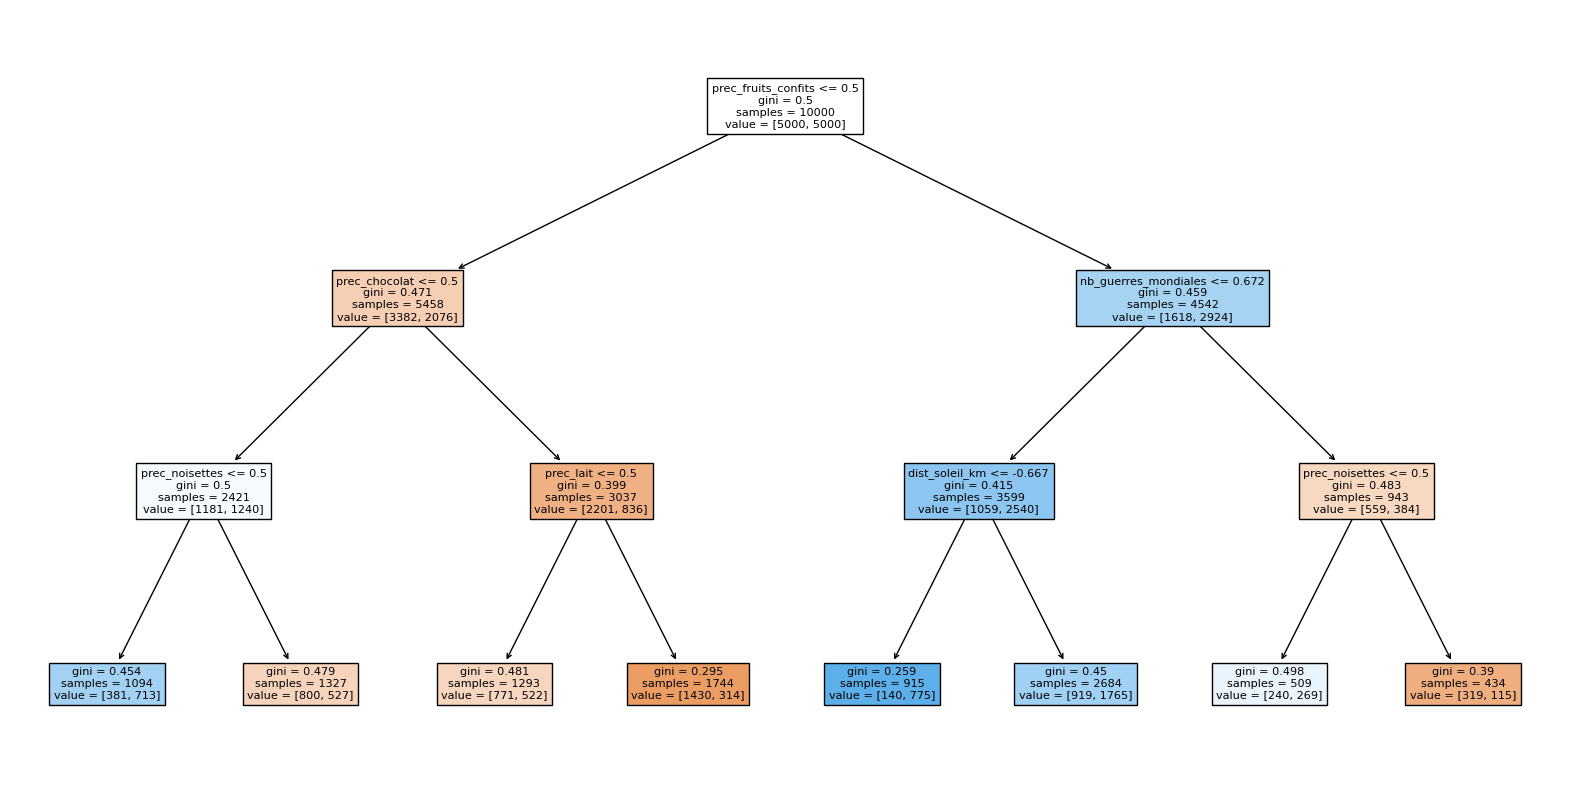

In [ ]:
from sklearn.tree import plot_tree

# On affiche l'arbre
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_df_train.columns)
plt.show()

Le graphique ci-dessus correspond à l'arbre de décision du modèle par défaut. Les variables les plus proches de la racine sont les variables les plus importantes pour réaliser la classification. On peut voir que la présence de fuits confits dans le cookies est la caractéristique qui permet de débuter la classification et de faire une première séparation (équilibrée) de l'échantillon. La présence de chocolat et le nombre de guerres mondiales sont les suivantes.

##### Optimisation des hyperparamètres

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à rechercher
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Créer un modèle DecisionTreeClassifier
tree_opt = DecisionTreeClassifier(random_state=42)

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=tree_opt, param_grid=param_grid, cv=5, scoring='accuracy')

# Adapter le modèle aux données
grid_search.fit(X_df_train, y_df_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
# Afficher les meilleurs paramètres et la meilleure précision
print("Meilleurs paramètres trouvés par la recherche sur grille :")
print(grid_search.best_params_)
print("\nMeilleure précision trouvée par la recherche sur grille : {:.2f}%".format(grid_search.best_score_ * 100))


Meilleurs paramètres trouvés par la recherche sur grille :
{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

Meilleure précision trouvée par la recherche sur grille : 77.14%


Ce premier gridsearch nous donne les hyperparamètres optimaux ci dessus avec un score d'accuracy de 77.14%, ce qui est bien mieux que le modèle par défaut.


Gridsearch 2

Cette fois-ci, on change la plage de valeurs de max_depth et on supprime max_features.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à rechercher
param_grid_2 = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Créer un modèle DecisionTreeClassifier
tree_opt_2 = DecisionTreeClassifier(random_state=42)

# Créer l'objet GridSearchCV
grid_search_tree2 = GridSearchCV(estimator=tree_opt_2, param_grid=param_grid_2, cv=5, scoring='accuracy')

# Adapter le modèle aux données
grid_search_tree2.fit(X_df_train, y_df_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
# Afficher les meilleurs paramètres et la meilleure précision
print("Meilleurs paramètres trouvés par la recherche sur grille :")
print(grid_search_tree2.best_params_)
print("\nMeilleure précision trouvée par la recherche sur grille : {:.2f}%".format(grid_search_tree2.best_score_ * 100))

Meilleurs paramètres trouvés par la recherche sur grille :
{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}

Meilleure précision trouvée par la recherche sur grille : 80.59%


le deuxième gridsearch nous donne un meilleur modèle avec 80.59% de bonnes prédictions sur l'ensemble des observations de l'échantillon train.

In [ ]:
#meilleur modèle :
best_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    splitter='random',
    random_state=42,
    )

# On entraine notre modèle
best_tree.fit(X_df_train, y_df_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=42,
                       splitter='random')

Importance des variables

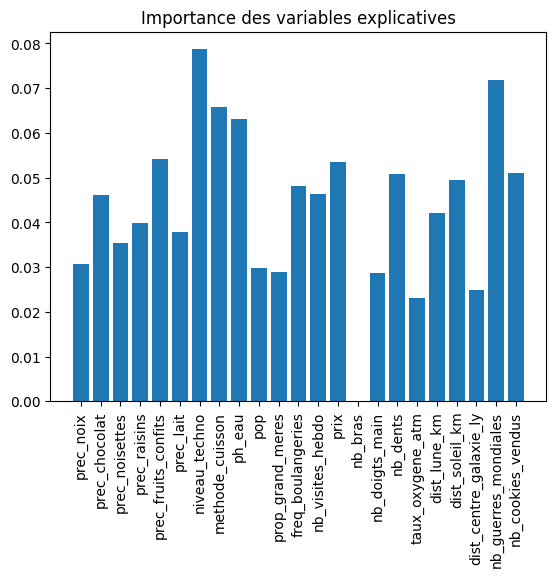

In [ ]:
#barplot de l'importance des variables
plt.bar(X_df_train.columns, best_tree.feature_importances_)
plt.xticks(rotation=90)
plt.title("Importance des variables explicatives")
plt.show()

Suivant le critère d'entropy, les 3 variables les plus importantes son le niveau de technologie, la méthode de cuisson et le nombre de guerres mondiales.

#### Bagging (Random Forest)

Le Random Forest (forêt aléatoire) est un algorithme de machine learning qui appartient à la famille des méthodes ensemblistes. Il est utilisé à la fois pour la classification et la régression. L'idée principale derrière le Random Forest est de construire un ensemble de plusieurs arbres de décision et de les combiner pour obtenir une prédiction plus robuste et générale.

##### Modèle par défaut

Nous réalisons un premier modèle par défaut avec les paramètres suivants :    
*   n_estimators : C'est le nombre d'arbres. Par défaut, il peut être réglé sur 100. Cela signifie que le Random Forest construira 100 arbres de décision.
*   criterion : C'est le critère de sépération. On utilise par défaut le 'gini' lors d'une classification.
*   max_depth : C'est la profondeur maximale de l'arbre. On le met à 3.
*   min_samples_split : C'est le nombre minimal d'échantillons requis pour diviser un nœud. Par défaut on le met à 2.
*   min_samples_leaf : C'est le nombre minimal d'échantillons par feuille. Par défaut, on le met à 1.
*   max_features : C'est le nombre maximal de caractéristiques à considérer pour la meilleure division. Par défaut on le met sur 'auto'.







In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# On instancie notre modèle
rf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    random_state=42,
    )

# On entraine notre modèle
rf.fit(X_df_train, y_df_train)

scores_rf = cross_val_score(rf, X_df_train, y_df_train, cv=5)
print("Score d'accuracy:", scores_rf.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Score d'accuracy: 0.718


Après cross-validation, ceci nous donne une accuracy de 71.8%. C'est mieux que le modèle par défaut de l'arbre de décision.

In [ ]:
#Choix des paramètres à optimiser:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Créer le modèle RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Créer l'objet GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Effectuer la recherche sur la grille sur l'ensemble d'entraînement
grid_search_rf.fit(X_df_train, y_df_train)

# Afficher les meilleurs paramètres et la meilleure précision
print("Meilleurs paramètres trouvés par la recherche sur grille :")
print(grid_search_rf.best_params_)
print("\nMeilleure précision trouvée par la recherche sur grille : {:.2f}%".format(grid_search_rf.best_score_ * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Meilleurs paramètres trouvés par la recherche sur grille :
{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Meilleure précision trouvée par la recherche sur grille : 86.90%


Le gridsearch nous a permis d'atteindre les 86.90% d'accuracy. Ce qui est bien mieux que le modèle par défaut.

##### Gridsearch 2

In [ ]:
#hyperparamètres à optimiser
param_grid_rf2 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 25, 30]
}

# Créer le modèle RandomForestClassifier
rf_model2 = RandomForestClassifier(random_state=42, min_samples_split=5, min_samples_leaf=1, max_features='auto')

# Créer l'objet GridSearchCV
grid_search_rf2 = GridSearchCV(estimator=rf_model2, param_grid=param_grid_rf2, cv=5, scoring='accuracy')

# Effectuer la recherche sur la grille sur l'ensemble d'entraînement
grid_search_rf2.fit(X_df_train, y_df_train)

# Afficher les meilleurs paramètres et la meilleure précision
print("Meilleurs paramètres trouvés par la recherche sur grille :")
print(grid_search_rf2.best_params_)
print("\nMeilleure précision trouvée par la recherche sur grille : {:.2f}%".format(grid_search_rf2.best_score_ * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Meilleurs paramètres trouvés par la recherche sur grille :
{'max_depth': 20, 'n_estimators': 300}

Meilleure précision trouvée par la recherche sur grille : 86.98%


Pur celui-ci, nous avons retenu deux hyperparamètres en augmentant la plage des valeurs. Pour le reste de paramètres nous avons utilisé les résultats du premier gridsearch. L'accuracy a légèrement augmenté atteignant les 86.98% de bonnes prédictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#le meilleur modèle retenu pour le random forest :
best_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='auto',
    random_state=42,
    )

# On entraine notre modèle
best_rf.fit(X_df_train, y_df_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=20, max_features='auto', min_samples_split=5,
                       n_estimators=300, random_state=42)

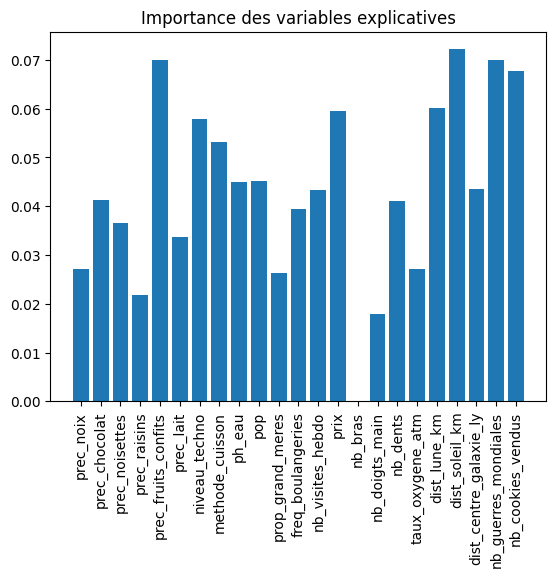

In [ ]:
plt.bar(X_df_train.columns, best_rf.feature_importances_)
plt.xticks(rotation=90)
plt.title("Importance des variables explicatives")
plt.show()

Dans les variables importantes, on retrouve les fruits confits. Il y a également la distance au soleil, le nombre de guerres mondiales et le nombre de cookies vendus qui sont importantes. Le critère de séparation est par défaut c'est-à-dire le 'gini'.

#### Boosting (Gradient Boosting)

Le Gradient Boosting est une technique de machine learning ensembliste qui construit un modèle prédictif sous la forme d'un ensemble de modèles de base, généralement des arbres de décision. Contrairement aux méthodes ensemblistes comme le Random Forest, le Gradient Boosting construit les modèles de manière séquentielle, en corrigeant les erreurs du modèle précédent.

##### Modèle par défaut

Pour la réalisation du modèle par défaut nous utilisons les paramètres suivants:
*  n_estimators : c'est le nombre d'arbres (100)
*  max_depth : c'est la profondeur maximale des arbres (3)
*  min_samples_split : c'est le nombre minimal d'échantillons requis pour diviser un nœud (2)
*   min_samples_leaf : c'est le nombre minimal d'échantillons par feuille (1)
*   learning_rate : c'est le taux d'apprentissage (0.1)
*   subsample : c'est la fraction d'échantillons utilisée pour ajuster chaque arbre de décision dans le modèle. (1.0)







In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# On instancie notre modèle
gb = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    learning_rate=0.1,
    subsample=1.0,
    random_state=42,
    )

# On entraine notre modèle
gb.fit(X_df_train, y_df_train)

scores_gb = cross_val_score(gb, X_df_train, y_df_train, cv=5)
print("Score d'accuracy:", scores_gb.mean())

Score d'accuracy: 0.7964999999999999


Le score d'accuracy de ce modèle par défaut est de 79.65%, meilleur que les deux autres modèles par défaut.

Gridsearch

In [ ]:
# Définir la grille des paramètres à rechercher
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
}

# Créer le modèle GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Créer l'objet GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='accuracy')

# Effectuer la recherche sur la grille sur l'ensemble d'entraînement
grid_search_gb.fit(X_df_train, y_df_train)

# Afficher les meilleurs paramètres et la meilleure précision
print("Meilleurs paramètres trouvés par la recherche sur grille :")
print(grid_search_gb.best_params_)
print("\nMeilleure précision trouvée par la recherche sur grille : {:.2f}%".format(grid_search_gb.best_score_ * 100))

Meilleurs paramètres trouvés par la recherche sur grille :
{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}

Meilleure précision trouvée par la recherche sur grille : 86.63%


L'optmisation des hyperparamètres nous donne un score d'accuracy de 86.63%, meilleur que le modèle par défaut.
On a utilisé moins de paramètres que les autres modèles car le temps de calcul est plus long. Mais ceci a pour avantage de limiter le surapprentissage.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#meilleur modèle retenu pour le gradient boosting:
best_gb = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.2,
    random_state=42,
    )

# On entraine notre modèle
best_gb.fit(X_df_train, y_df_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=10, random_state=42)

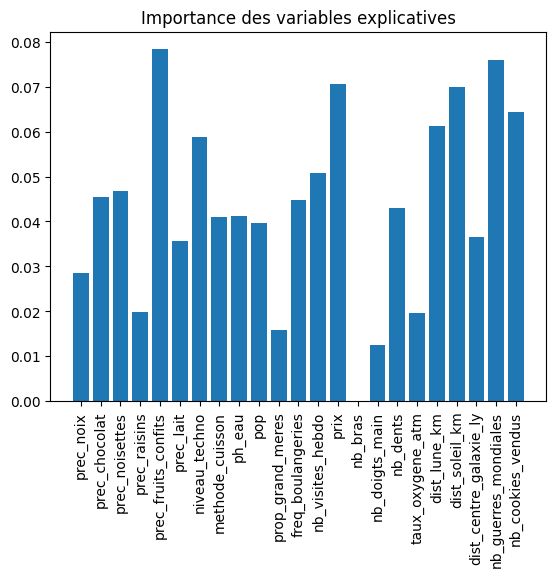

In [ ]:
plt.bar(X_df_train.columns, best_gb.feature_importances_)
plt.xticks(rotation=90)
plt.title("Importance des variables explicatives")
plt.show()

Les variables les plus importantes sont la présence de fruits confits, le nombre de guerres mondiales, le prix et la distance au soleil. Le critère de séparation est celui par défaut pour la classification, c'est-à-dire 'gini'.

## Conclusion

In [ ]:
#création d'un tableau regroupant les résultats des meilleurs modèles
valeurs = {
    'Modèle': ['best_tree', 'best_rf', 'best_gb'],
    'Accuracy': [80.59, 86.98, 86.63]
}
# Création d'un DataFrame à partir du dictionnaire
tableau = pd.DataFrame(valeurs)

tableau

,Modèle,Accuracy
0,best_tree,80.59
1,best_rf,86.98
2,best_gb,86.63


D'après le tableau, on peut voir que le modèle le plus performant est celui du random forest. Cependant le modèle du gradient boosting utilise moins d'hyperparamètres. Il y a moins de suspicion d'overfitting de ce dernier. A voir ce que cela donne avec le score des prédictions.

## Discussion

Le score de performance reste à améliorer. On aurait pu modifier ceci peut être au niveau des données, avec la méthode de correction des valeurs aberrantes qui semblait avoir des limites. En effet, en utilisant un seuil de 1.5 fois l'écart interquartile celui-ci aurait pu prendre en compte des valeurs non aberrantes ou ne pas prendre en compte toutes les valeurs aberrantes (tout dépend de la distribution de la variable). Il y a de plus, un surplus d'informations en ce qui concerne les variables qualitatives. Il y a de nombreuse dépendance. Des variables aurait dû être supprimées.

On aurait pu faire des prédictions d'une autre manière pour savoir si le modèle a surappris ou non, en utilisant un troisième échantillon. On aurait pu diviser l'échantillon train en un nouveau échantillon train et un échantillon validation. Ceci aurait permis de dresser les matrices de confusion pour voir comment se répartissent les valeurs prédites et utiliser d'autres métriques de performance.

## Prédictions

In [ ]:
# On prédit les valeurs de y pour X_test
y_pred_rf = best_rf.predict(base_test)
y_pred_rf

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
# Créer un dataframe avec les valeurs prédites
df_predictions_rf = pd.DataFrame({'cookie_quality': y_pred_rf})
df_predictions_rf

,cookie_quality
0,1
1,0
2,0
3,0
4,1
...,...
1995,1
1996,1
1997,1
1998,1


In [ ]:
# Remplacer les valeurs 1 par "yum" et les valeurs 0 par "yuk"
df_predictions_rf['cookie_quality'] = df_predictions_rf['cookie_quality'].replace({1: 'yum', 0: 'yuk'})
df_predictions_rf

,cookie_quality
0,yum
1,yuk
2,yuk
3,yuk
4,yum
...,...
1995,yum
1996,yum
1997,yum
1998,yum


In [ ]:
#Concaténation des variables id et cookie_quality
submission_rf = pd.concat([test['id'], df_predictions_rf], axis=1)
submission_rf

,id,cookie_quality
0,98,yum
1,257,yuk
2,279,yuk
3,280,yuk
4,363,yum
...,...,...
1995,254286,yum
1996,254296,yum
1997,254454,yum
1998,254530,yum


In [ ]:
# Enregistrez le dataframe au format CSV dans Google Drive
#submission_rf.to_csv('/content/drive/My Drive/submission.csv', index=False)